# Classification Project on House Grades

## Overview :

Property buyers have different requirements. To facilitate this, real estate companies prefer categorizing various houses into different grades based on various parameters. This would help agents in identifying the type of house a customer is looking for. This way, the search for the house can be narrowed down
by focusing only on the ‘condition of the house’.

The Grade (condition of the house that ranges from A (Best) – E (Worst) ) can also be used by existing owners to list their properties for sale. Grading helps them in arriving at a price of the house.

### Bussiness Objective :

Build a predictive model to determine the Grade of house (The grades are A,B,C,D, and E)

So we are going to work and classify the houses into different Grades according to the some of the features mentioned .
This is the multi-class Classification project.
lets see into details now .

## Importing some of the baisc libraries 

In [1]:
import matplotlib.pyplot as plt             
from tabulate import tabulate               
import matplotlib as mat                   
import seaborn as sns                       
import pandas as pd                         
import numpy as np   
from tabulate import tabulate
import warnings
warnings.filterwarnings("ignore")

## Importing Dataset 

In [2]:
data_df=pd.read_csv('Project2_Classification_HouseGrade_Data_Project-625edbc5-68f4-4fe4-97f2-29ba63a71a0e.csv')
data_df.head()

Id  Area(total)  Trooms  Nbedrooms  Nbwashrooms  Twashrooms roof  \
0   1          339       6          5            4           6   NO   
1   2          358       5          4            3           4  YES   
2   3          324       7          5            4           5  YES   
3   4          330       6          4            3           5  YES   
4   5          320       7          4            4           5   NO   

   Roof(Area)  Lawn(Area)  Nfloors  API  ANB  Expected price Grade  
0           0          76        2   79    6            3481     D  
1          71          96        3   72    4            3510     D  
2         101         117        5   64    3            3748     C  
3         101          82        2   59    2            3134     D  
4           0          75        3   40    1            3843     D

# Data Dictionary :

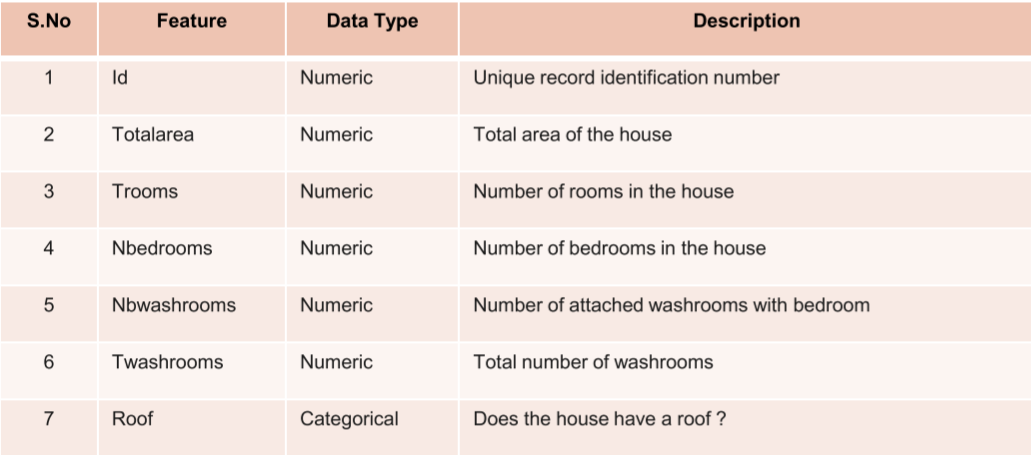

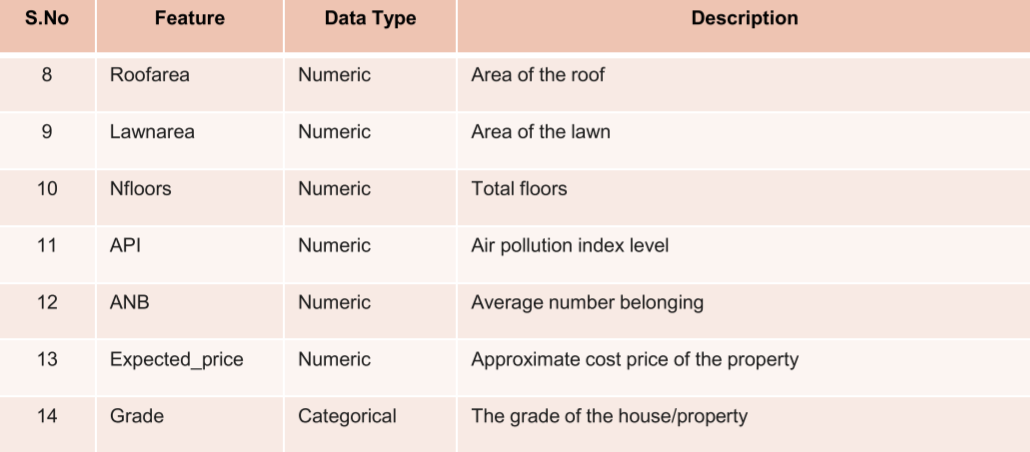

## Exploring the Data 

So we need to look into the Grade , lets see how many unique value does Grade have.

### Unique Values in Target 

In [3]:
data_df['Grade'].unique()

array(['D', 'C', 'B', 'A', 'E'], dtype=object)

### Information about features of differnt columns :

In [4]:
data_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              3000 non-null   int64 
 1   Area(total)     3000 non-null   int64 
 2   Trooms          3000 non-null   int64 
 3   Nbedrooms       3000 non-null   int64 
 4   Nbwashrooms     3000 non-null   int64 
 5   Twashrooms      3000 non-null   int64 
 6   roof            3000 non-null   object
 7   Roof(Area)      3000 non-null   int64 
 8   Lawn(Area)      3000 non-null   int64 
 9   Nfloors         3000 non-null   int64 
 10  API             3000 non-null   int64 
 11  ANB             3000 non-null   int64 
 12  Expected price  3000 non-null   int64 
 13  Grade           3000 non-null   object
dtypes: int64(12), object(2)
memory usage: 625.7 KB


### Shape of the Dataset

In [5]:
data_df.shape

(3000, 14)

### Summarizing the dataset 

In [6]:
data_df.describe()

Id  Area(total)       Trooms    Nbedrooms  Nbwashrooms  \
count  3000.000000  3000.000000  3000.000000  3000.000000  3000.000000   
mean   1500.500000   325.117000     7.021667     5.023000     4.513667   
std     866.169729    20.507742     1.421221     1.634838     1.715263   
min       1.000000   290.000000     5.000000     2.000000     1.000000   
25%     750.750000   308.000000     6.000000     4.000000     3.000000   
50%    1500.500000   325.000000     7.000000     5.000000     4.000000   
75%    2250.250000   343.000000     8.000000     6.000000     6.000000   
max    3000.000000   360.000000     9.000000     8.000000     8.000000   

        Twashrooms   Roof(Area)   Lawn(Area)      Nfloors          API  \
count  3000.000000  3000.000000  3000.000000  3000.000000  3000.000000   
mean      6.010667    48.980667    95.609333     4.013333    70.190667   
std       1.786136    48.746641    14.837388     1.621532    17.563460   
min       2.000000     0.000000    70.000000     1.000000    40.000000   
25%       5.000000     0.000000    83.000000     3.000000    55.000000   
50%       6.000000    71.000000    96.000000     4.000000    70.000000   
75%       7.000000    96.000000   109.000000     5.000000    85.000000   
max      10.000000   120.000000   120.000000     7.000000   100.000000   

              ANB  Expected price  
count  3000.00000     3000.000000  
mean      3.47900     3782.938333  
std       1.69426      567.189995  
min       1.00000     2504.000000  
25%       2.00000     3354.000000  
50%       4.00000     3771.000000  
75%       5.00000     4208.000000  
max       6.00000     5216.000000

### Columns :

In [7]:
data_df.columns

Index(['Id', 'Area(total)', 'Trooms', 'Nbedrooms', 'Nbwashrooms', 'Twashrooms',
       'roof', 'Roof(Area)', 'Lawn(Area)', 'Nfloors', 'API', 'ANB',
       'Expected price', 'Grade'],
      dtype='object')

### Missing values 

In [8]:
data_df.isnull().sum()

Id                0
Area(total)       0
Trooms            0
Nbedrooms         0
Nbwashrooms       0
Twashrooms        0
roof              0
Roof(Area)        0
Lawn(Area)        0
Nfloors           0
API               0
ANB               0
Expected price    0
Grade             0
dtype: int64

#### So we dont have null values 

### Categorizing Data

In [9]:
cat=[]
con=[]
for i in data_df.columns:
    if data_df[i].nunique()<10:
        cat.append(i)
    else:
        con.append(i)
print(tabulate({'Cat':cat,'Con':con},headers=['Categorical','Continuous']))        


Categorical    Continuous
-------------  --------------
Trooms         Id
Nbedrooms      Area(total)
Nbwashrooms    Roof(Area)
Twashrooms     Lawn(Area)
roof           API
Nfloors        Expected price
ANB
Grade


### Unique Values in each columns 

In [10]:
for i in data_df.columns:
    print(i,':',data_df[i].nunique())

Id : 3000
Area(total) : 71
Trooms : 5
Nbedrooms : 7
Nbwashrooms : 8
Twashrooms : 9
roof : 2
Roof(Area) : 52
Lawn(Area) : 51
Nfloors : 7
API : 61
ANB : 6
Expected price : 1647
Grade : 5


In [11]:
for i in data_df.columns:
    if data_df[i].nunique()<10:
        print(i,':',data_df[i].unique())

Trooms : [6 5 7 8 9]
Nbedrooms : [5 4 7 8 6 3 2]
Nbwashrooms : [4 3 6 7 5 2 8 1]
Twashrooms : [ 6  4  5  7  9  8  3  2 10]
roof : ['NO' 'YES']
Nfloors : [2 3 5 6 1 4 7]
ANB : [6 4 3 2 1 5]
Grade : ['D' 'C' 'B' 'A' 'E']


## Visualizing Categorical and Continuous Variable 

### Categorical 

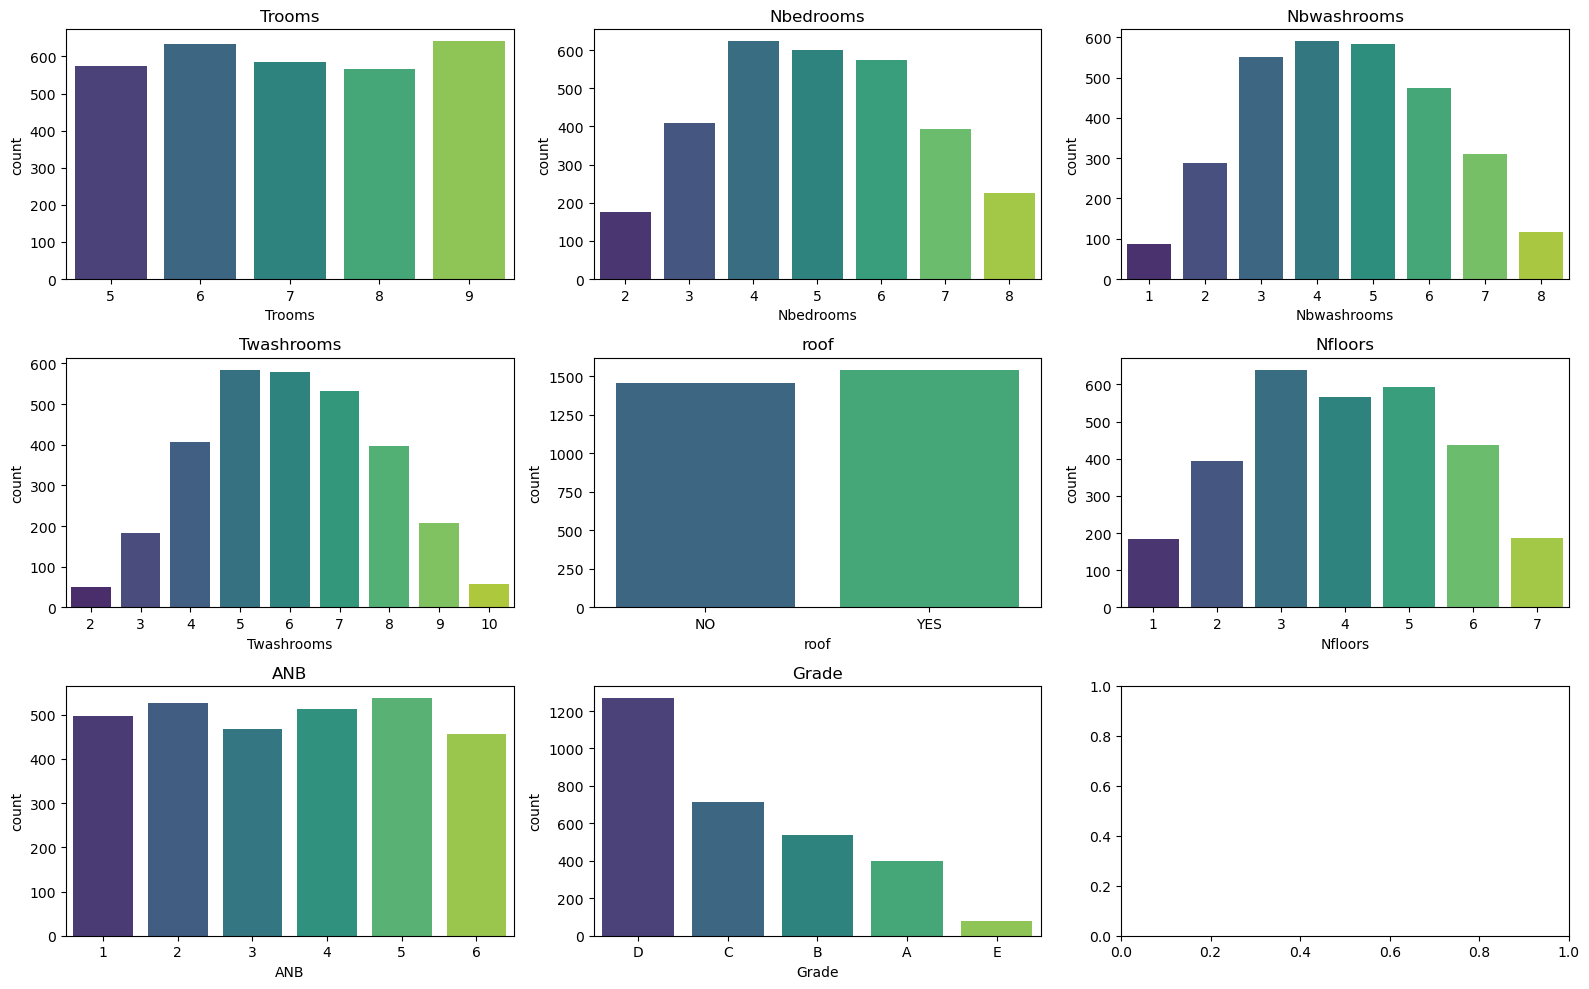

In [12]:
c=3
r=int(len(cat)/c)+1

figs,axes =plt.subplots(r,c,figsize=(16,10))

for i , ax in zip(cat,axes.flatten()[:len(cat)]):
    sns.countplot(data=data_df,x=data_df[i],ax=ax,palette='viridis')
    ax.set_title(i)
    plt.tight_layout()
plt.show()    

In [13]:
con.remove('Id')

### Continous 

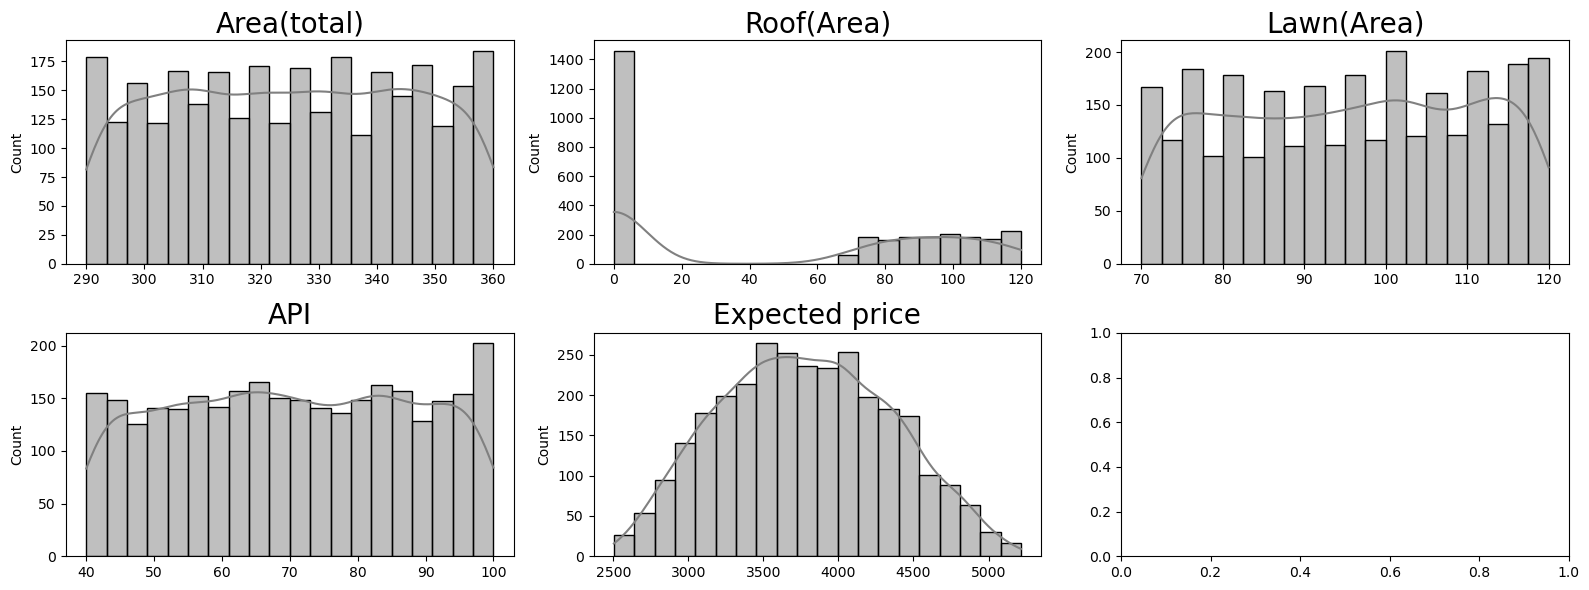

In [14]:
c=3
r=int(len(con)/r)+1

figs,axes =plt.subplots(r,c,figsize=(16,6),tight_layout=True)

for i , ax in zip(con,axes.flatten()[:len(con)]):
    sns.histplot(data=data_df,x=data_df[i].values,palette='magma',ax=ax,kde=True,bins=20,color='grey')
    
    ax.set_title(i,fontdict={'size':20})
plt.show() 

### We can see the Expected price is normally distribued and we have homes in variety of ranges to help the customer with different sorts of requirements .

# Note :

### Our Data have a unique rows identifier thats id , so we could drop the Id column and this will not impact our classification model and would help us understand the data better .

In [15]:
data_df=data_df.drop(columns='Id')
data_df.head()

Area(total)  Trooms  Nbedrooms  Nbwashrooms  Twashrooms roof  Roof(Area)  \
0          339       6          5            4           6   NO           0   
1          358       5          4            3           4  YES          71   
2          324       7          5            4           5  YES         101   
3          330       6          4            3           5  YES         101   
4          320       7          4            4           5   NO           0   

   Lawn(Area)  Nfloors  API  ANB  Expected price Grade  
0          76        2   79    6            3481     D  
1          96        3   72    4            3510     D  
2         117        5   64    3            3748     C  
3          82        2   59    2            3134     D  
4          75        3   40    1            3843     D

## Going to understand columns one by one in details :

## $$\;\;\;\; Interactive \ Univariate \ Analysis \ of \ Categorical \ Variables$$

In [16]:
from ipywidgets import interact

In [17]:
def cat_info(col): 
    print(f"Unique values in {data_df.columns[col]} are: {data_df.iloc[:,col].unique()}") 
    print(f"Mode of {data_df.columns[col]} is {data_df.iloc[:,col].mode()[0]}") 
    print(f"Number of missing values in {data_df.columns[col]} is {data_df.iloc[:,col].isnull().sum()}") 
    if data_df.iloc[:,col].isnull().sum() > 0:  
        print(f"\nThere are null values in the {data_df.columns[col]} column")

In [18]:
data_df2=data_df[cat]
def cat_vis(col,palette='magma'):
    cat_info(col)
    
    sns.countplot(data=data_df2,x=data_df2.iloc[:,col],palette=palette)
    plt.title(data_df2.columns[col])
    plt.show()

interact(cat_vis,col=(0,len(data_df2.columns)-1,1),palette=['magma','viridis'],columns=[cat])    

interactive(children=(IntSlider(value=3, description='col', max=7), Dropdown(description='palette', options=('…

<function __main__.cat_vis(col, palette='magma')>

## $$\;\;\;\;  Univariate \ Analysis \ of \ Categorical \ Variables$$

In [19]:
def catt_info(col): 
    print(f"Unique values in {col} are: {data_df[col].unique()}") 
    print(f"Mode of {col} is {data_df[col].mode()[0]}")  
    print(f"Number of missing values in {col} is {data_df[col].isnull().sum()}") 
    if data_df[col].isnull().sum() > 0: 
        print(f"\nThere are null values in the {col} column")

# 1. Analysis of Trooms(Total Rooms )

In [20]:
catt_info('Trooms')

Unique values in Trooms are: [6 5 7 8 9]
Mode of Trooms is 9
Number of missing values in Trooms is 0


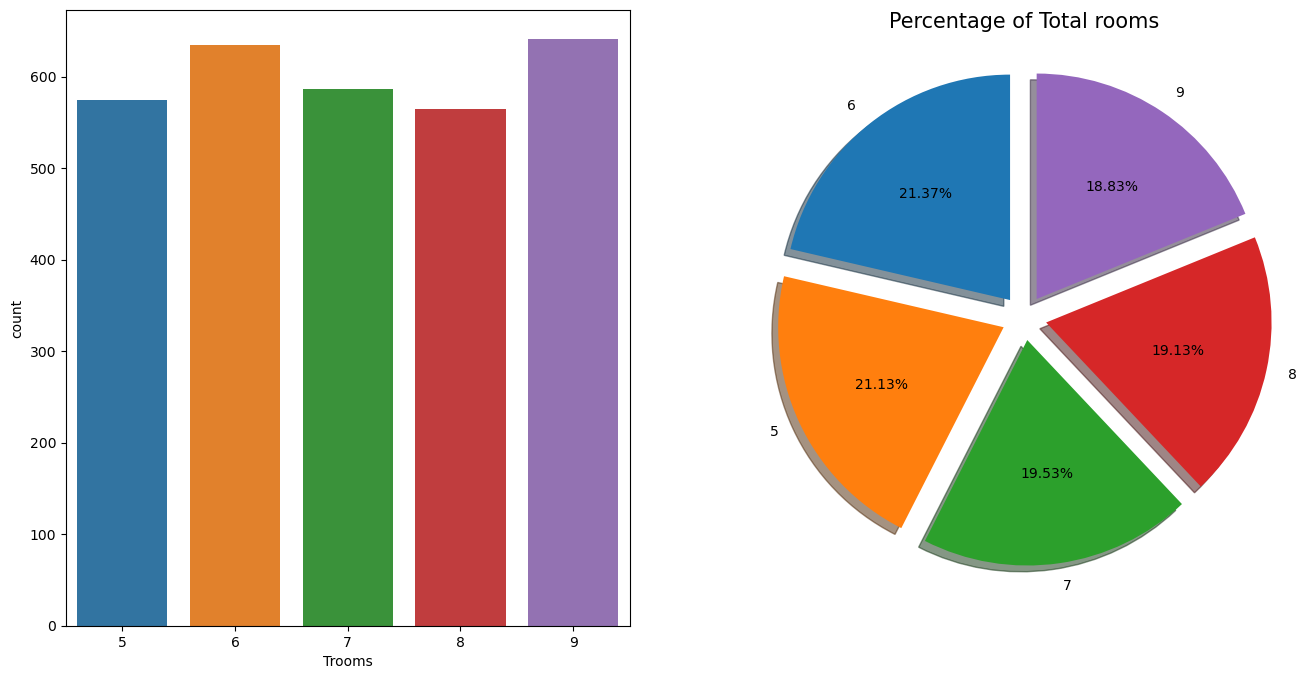

In [21]:
explode=[0.1,0.1,0.1,0.1,0.1]
figs,axes = plt.subplots(1,2,figsize=(16,8))
sns.countplot(data=data_df,x=data_df['Trooms'],ax=axes[0])
ax.set_title('Count of Total Rooms in houses')
plt.title('Percentage of Total rooms',fontsize=15)
plt.pie(data_df['Trooms'].value_counts(),labels=data_df['Trooms'].unique(),autopct='%0.2f%%',explode=explode,shadow=True,startangle=90);

### We see that the rooms are high in number and they are kinda targeting bigger family and would be targeting higher prices and family means more safer bussiness.

# 2. Analysis of Number of Bedrooms 

In [22]:
catt_info('Nbedrooms')

Unique values in Nbedrooms are: [5 4 7 8 6 3 2]
Mode of Nbedrooms is 4
Number of missing values in Nbedrooms is 0


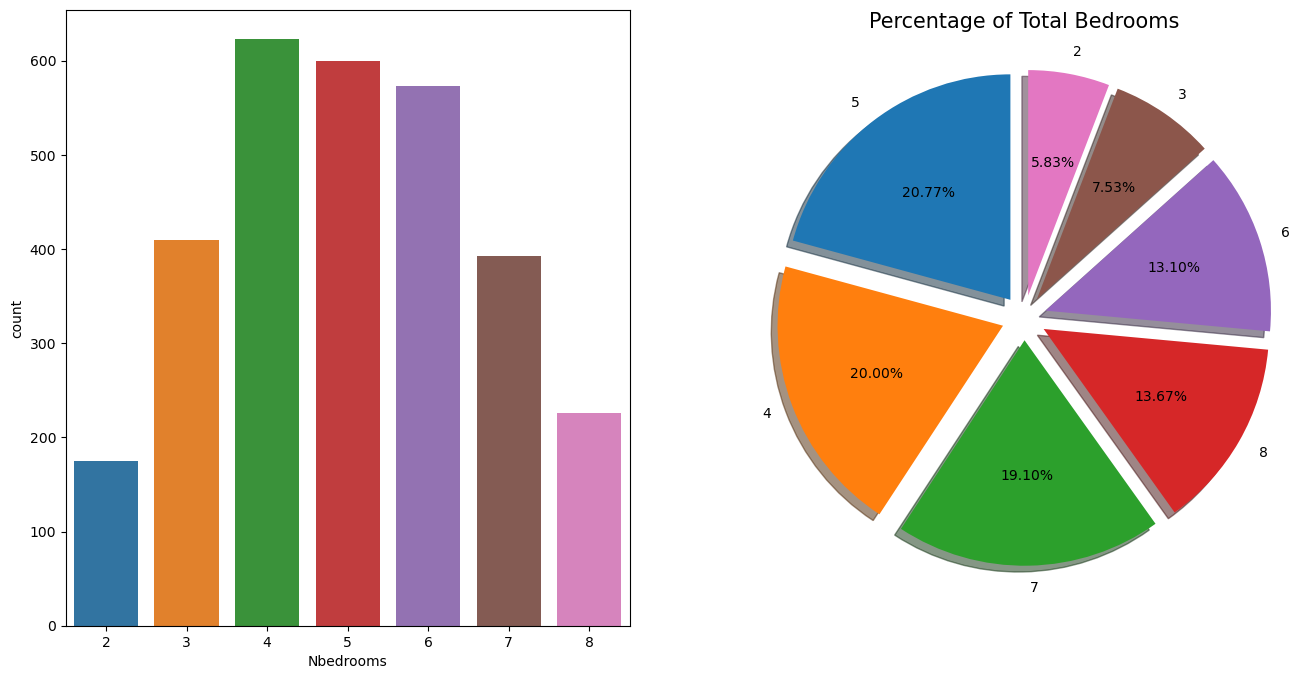

In [23]:
explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1]
figs,axes = plt.subplots(1,2,figsize=(16,8))
sns.countplot(data=data_df,x=data_df['Nbedrooms'],ax=axes[0])
ax.set_title('Count of Total Bedrooms in houses')
plt.title('Percentage of Total Bedrooms',fontsize=15)
plt.pie(data_df['Nbedrooms'].value_counts(),labels=data_df['Nbedrooms'].unique(),autopct='%0.2f%%',explode=explode,shadow=True,startangle=90);

### We again see the number of bedrooms are kinda 4-7 which is again suitable for a family and again higher price.

# 3. Analysis of Number of Nbwashrooms (Attached Washrooms)


In [24]:
catt_info('Nbwashrooms')


Unique values in Nbwashrooms are: [4 3 6 7 5 2 8 1]
Mode of Nbwashrooms is 4
Number of missing values in Nbwashrooms is 0


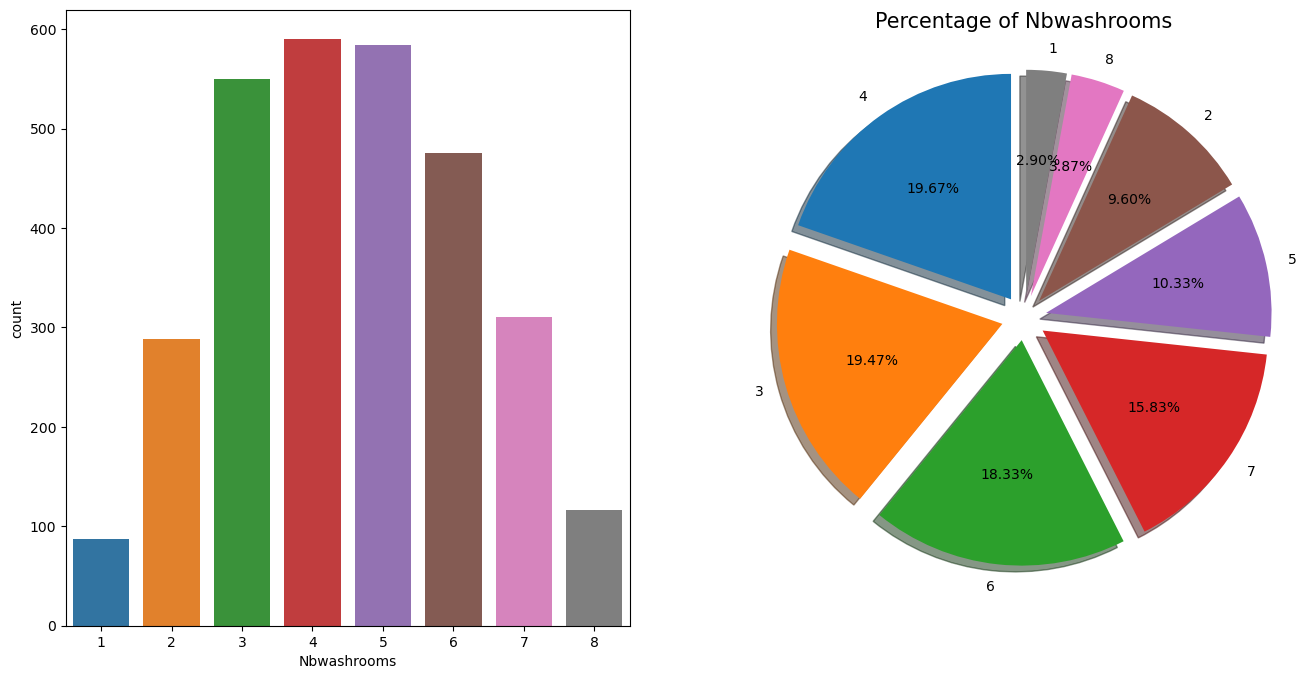

In [25]:
explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
figs,axes = plt.subplots(1,2,figsize=(16,8))
sns.countplot(data=data_df,x=data_df['Nbwashrooms'],ax=axes[0])
ax.set_title('Count of Total Nbwashrooms (Attached Washrooms) in houses')
plt.title('Percentage of Nbwashrooms',fontsize=15)
plt.pie(data_df['Nbwashrooms'].value_counts(),labels=data_df['Nbwashrooms'].unique(),autopct='%0.2f%%',explode=explode,shadow=True,startangle=90);


### We again see the number of bathromms are kinda 3-7 which is again suitable for a family and again higher price. So kind of the property prices are going to be higher .

# 4 . Analysis of Total bathrooms 

In [26]:
catt_info('Twashrooms')

Unique values in Twashrooms are: [ 6  4  5  7  9  8  3  2 10]
Mode of Twashrooms is 5
Number of missing values in Twashrooms is 0


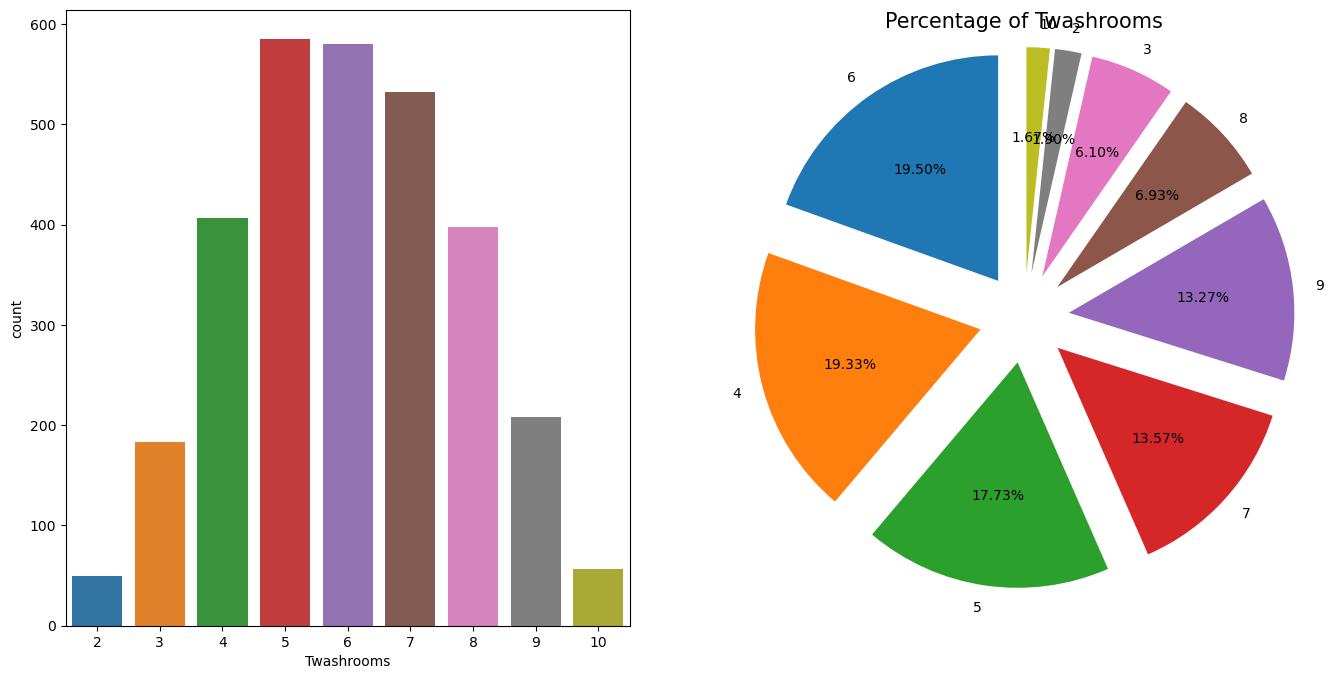

In [27]:

explode=[0.2]*len(data_df['Twashrooms'].unique())
figs,axes = plt.subplots(1,2,figsize=(16,8))
sns.countplot(data=data_df,x=data_df['Twashrooms'],ax=axes[0])
ax.set_title('Count of Total Twashrooms (Total Washrooms) in houses')
plt.title('Percentage of Twashrooms',fontsize=15)
plt.pie(data_df['Twashrooms'].value_counts(),labels=data_df['Twashrooms'].unique(),autopct='%0.2f%%',explode=explode,shadow=False,startangle=90);


### We again see the number of bathromms are kinda 3-7 which is again suitable for a family and again higher price. So kind of the property prices are going to be higher .

# 5. Analysis of NFloors 

In [28]:
catt_info('Nfloors')

Unique values in Nfloors are: [2 3 5 6 1 4 7]
Mode of Nfloors is 3
Number of missing values in Nfloors is 0


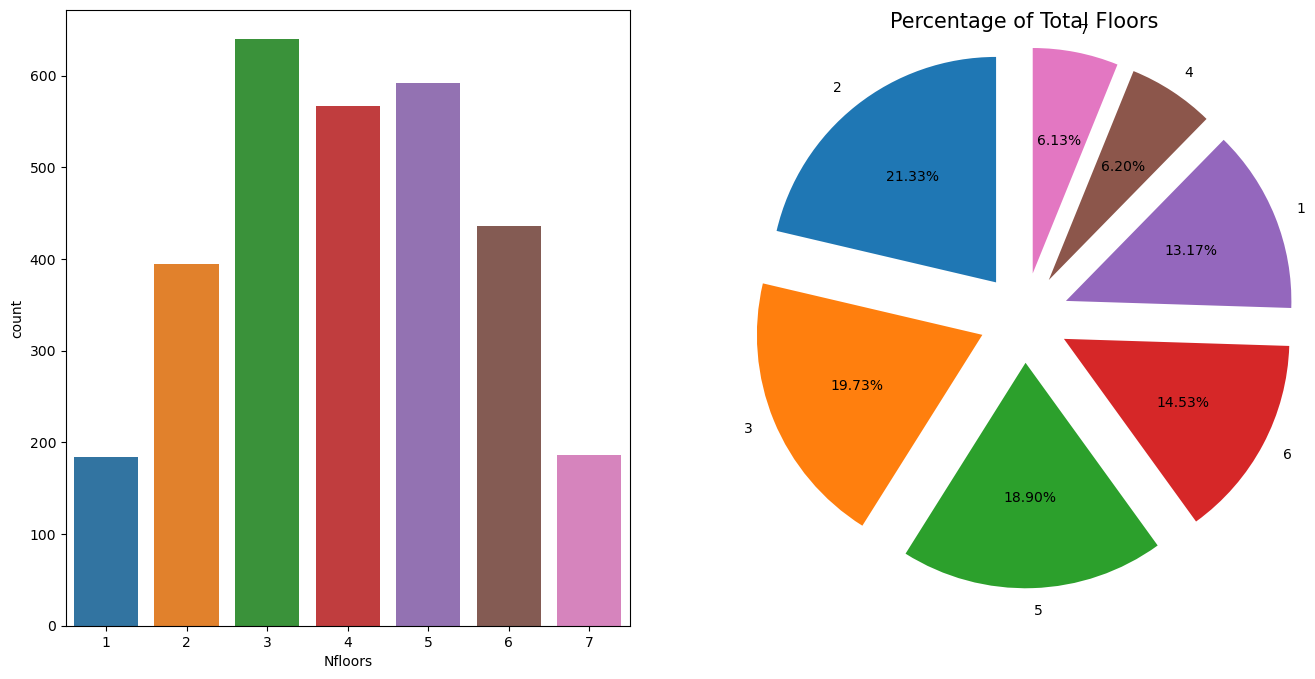

In [29]:

explode=[0.2]*len(data_df['Nfloors'].unique())
figs,axes = plt.subplots(1,2,figsize=(16,8))
sns.countplot(data=data_df,x=data_df['Nfloors'],ax=axes[0])
ax.set_title('Count of Total Number floors in houses')
plt.title('Percentage of Total Floors',fontsize=15)
plt.pie(data_df['Nfloors'].value_counts(),labels=data_df['Nfloors'].unique(),autopct='%0.2f%%',explode=explode,shadow=False,startangle=90);


### Number of floors are higher so kinda expensive property we are looking at 

# 6 . Analysis of roof 

In [30]:
catt_info('roof')

Unique values in roof are: ['NO' 'YES']
Mode of roof is YES
Number of missing values in roof is 0


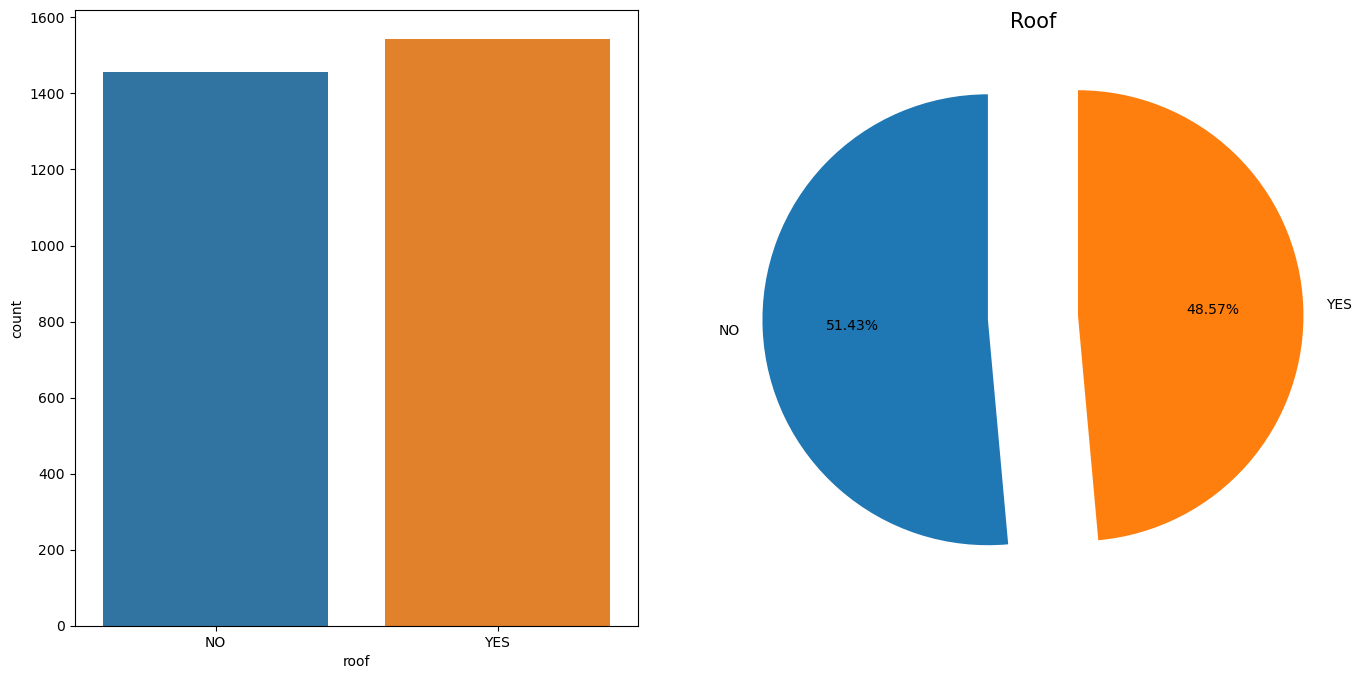

In [31]:

explode=[0.2]*len(data_df['roof'].unique())
figs,axes = plt.subplots(1,2,figsize=(16,8))
sns.countplot(data=data_df,x=data_df['roof'],ax=axes[0])
ax.set_title('Roof')
plt.title('Roof',fontsize=15)
plt.pie(data_df['roof'].value_counts(),labels=data_df['roof'].unique(),autopct='%0.2f%%',explode=explode,shadow=False,startangle=90);


### The Houses have roofs in half proportion suiting for every kind of customers and make it more varierty 

# 7. Analysis of Grade 

In [32]:
catt_info('Grade')

Unique values in Grade are: ['D' 'C' 'B' 'A' 'E']
Mode of Grade is D
Number of missing values in Grade is 0


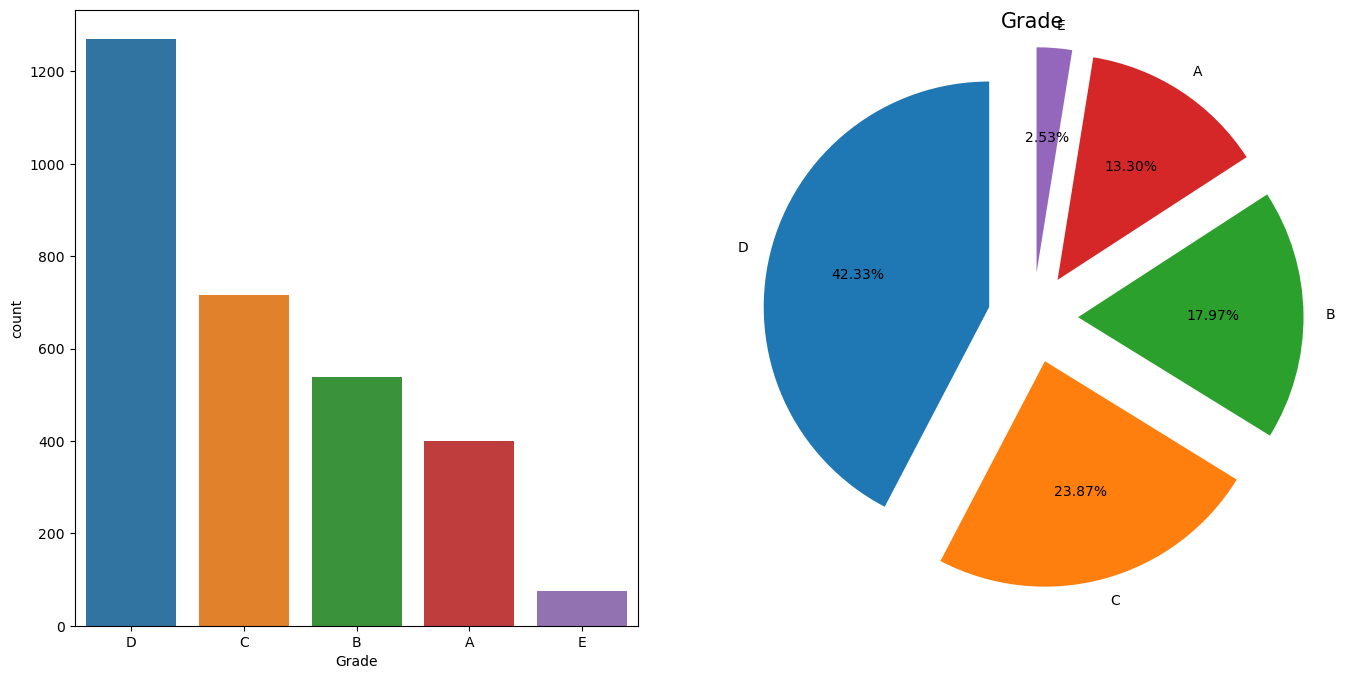

In [33]:

explode=[0.2]*len(data_df['Grade'].unique())
figs,axes = plt.subplots(1,2,figsize=(16,8))
sns.countplot(data=data_df,x=data_df['Grade'],ax=axes[0])
ax.set_title('Grade')
plt.title('Grade',fontsize=15)
plt.pie(data_df['Grade'].value_counts(),labels=data_df['Grade'].unique(),autopct='%0.2f%%',explode=explode,shadow=False,startangle=90);


# 8. Analysis of ANB 

In [34]:
catt_info('ANB')

Unique values in ANB are: [6 4 3 2 1 5]
Mode of ANB is 5
Number of missing values in ANB is 0


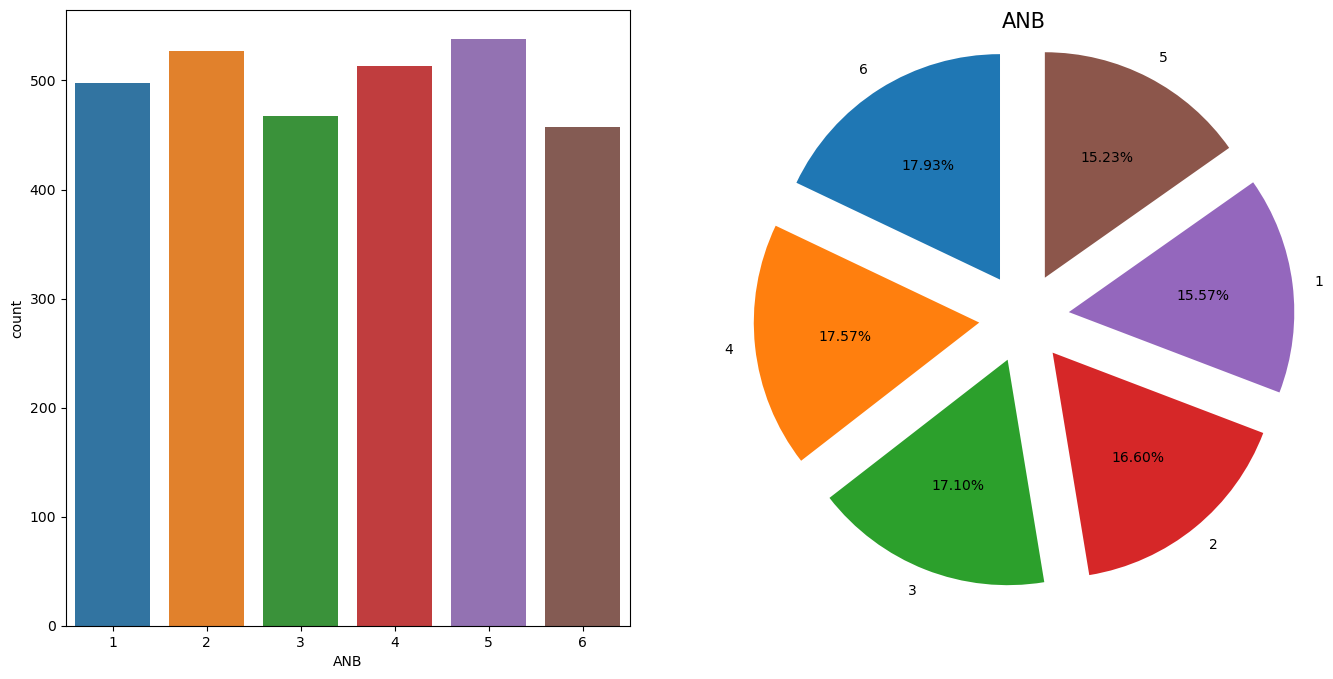

In [35]:

explode=[0.2]*len(data_df['ANB'].unique())
figs,axes = plt.subplots(1,2,figsize=(16,8))
sns.countplot(data=data_df,x=data_df['ANB'],ax=axes[0])
ax.set_title('ANB')
plt.title('ANB',fontsize=15)
plt.pie(data_df['ANB'].value_counts(),labels=data_df['ANB'].unique(),autopct='%0.2f%%',explode=explode,shadow=False,startangle=90);


## $$\;\;\;\;\;\;Univariate \ Analysis \ of \ Numerical(Continuous) \ Variables$$

In [36]:
def num_info(col):
    print(f"The mean of the {data_df.columns[col]} is {data_df[data_df.columns[col]].mean()}")
    print(f"The median of the {data_df.columns[col]} is {data_df[data_df.columns[col]].median()}")
    print(f"The standard deviation of the {data_df.columns[col]} is {data_df[data_df.columns[col]].std()}")
    print(f"Number of missing values in the {data_df.columns[col]} is {data_df[data_df.columns[col]].isnull().sum()}")

In [37]:
data_df1=data_df[con]
def con_vis(col,palette='magma'):
    num_info(col)
    figs,axes = plt.subplots(1,2,figsize=(12,7))
    sns.boxplot(data=data_df1,x=data_df1.iloc[:,col],palette=palette,ax=axes[0])
    sns.histplot(data=data_df1,x=data_df1.iloc[:,col],palette=palette,ax=axes[1],kde=True)
    plt.title(data_df1.columns[col])
    plt.show()

interact(con_vis,col=(0,len(data_df1.columns)-1,1),palette=['magma','viridis'],columns=[cat])    

interactive(children=(IntSlider(value=2, description='col', max=4), Dropdown(description='palette', options=('…

<function __main__.con_vis(col, palette='magma')>

# Numerical Analysis 

In [38]:
def num_infoo(col):
    print(f"The mean of the {col} is {data_df[col].mean()}")
    print(f"The median of the {col} is {data_df[col].median()}")
    print(f"The standard deviation of the {col} is {data_df[col].std()}")
    print(f"Number of missing values in the {col} is {data_df[col].isnull().sum()}")

# 1 . Analysis of Area 

In [39]:
num_infoo('Area(total)')

The mean of the Area(total) is 325.117
The median of the Area(total) is 325.0
The standard deviation of the Area(total) is 20.50774244442138
Number of missing values in the Area(total) is 0


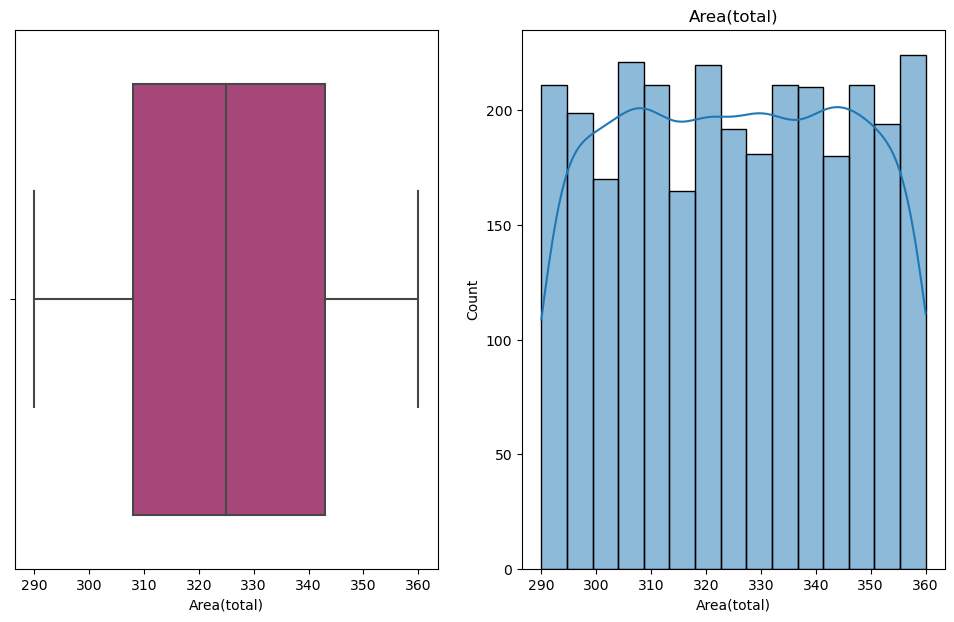

In [40]:
figs,axes = plt.subplots(1,2,figsize=(12,7))
sns.boxplot(data=data_df,x=data_df['Area(total)'],palette='magma',ax=axes[0])
sns.histplot(data=data_df,x=data_df['Area(total)'],palette='magma',ax=axes[1],kde=True)
plt.title('Area(total)')
plt.show()

# 2. Analysis of Roof 

In [41]:
num_infoo('Roof(Area)')

The mean of the Roof(Area) is 48.980666666666664
The median of the Roof(Area) is 71.0
The standard deviation of the Roof(Area) is 48.74664129867301
Number of missing values in the Roof(Area) is 0


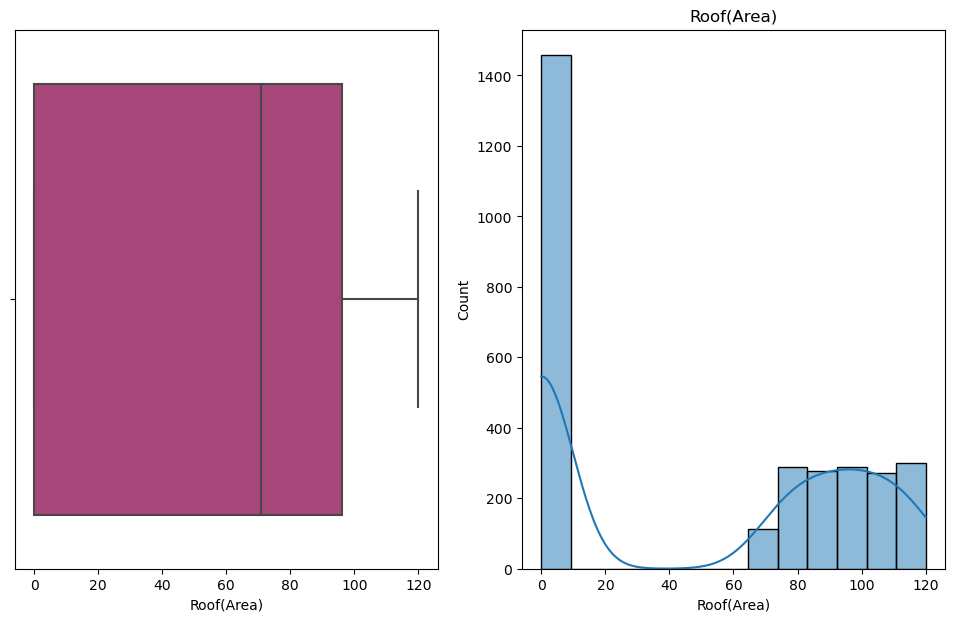

In [42]:
figs,axes = plt.subplots(1,2,figsize=(12,7))
sns.boxplot(data=data_df,x=data_df['Roof(Area)'],palette='magma',ax=axes[0])
sns.histplot(data=data_df,x=data_df['Roof(Area)'],palette='magma',ax=axes[1],kde=True)
plt.title('Roof(Area)')
plt.show()

# 3. Analysis of Lawn

In [43]:
num_infoo('Lawn(Area)')

The mean of the Lawn(Area) is 95.60933333333334
The median of the Lawn(Area) is 96.0
The standard deviation of the Lawn(Area) is 14.83738843555081
Number of missing values in the Lawn(Area) is 0


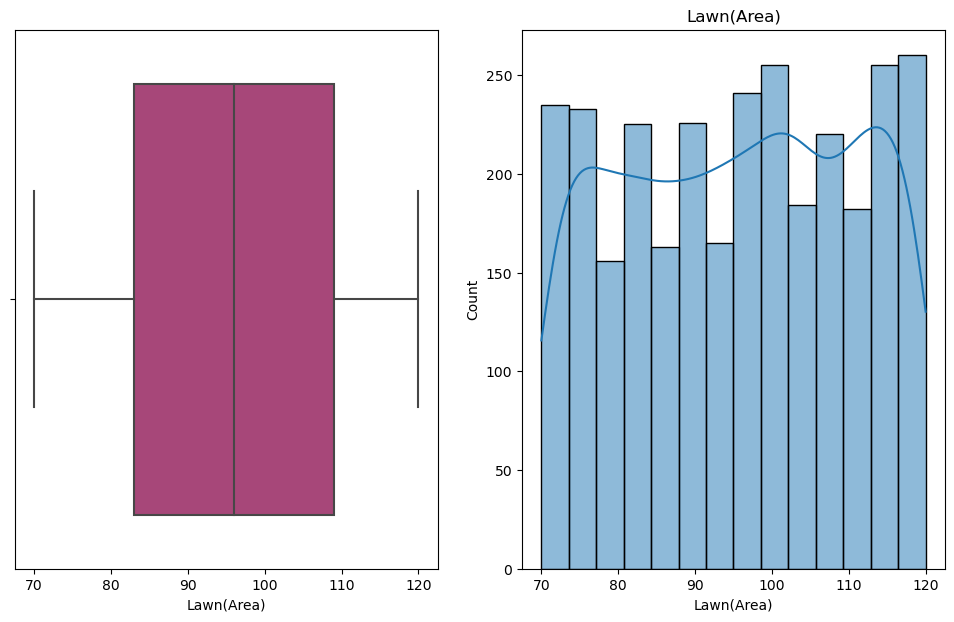

In [44]:
figs,axes = plt.subplots(1,2,figsize=(12,7))
sns.boxplot(data=data_df,x=data_df['Lawn(Area)'],palette='magma',ax=axes[0])
sns.histplot(data=data_df,x=data_df['Lawn(Area)'],palette='magma',ax=axes[1],kde=True)
plt.title('Lawn(Area)')
plt.show()

# 4. Analysis of Expected Price 

In [45]:
num_infoo('Expected price')

The mean of the Expected price is 3782.9383333333335
The median of the Expected price is 3771.0
The standard deviation of the Expected price is 567.1899952345067
Number of missing values in the Expected price is 0


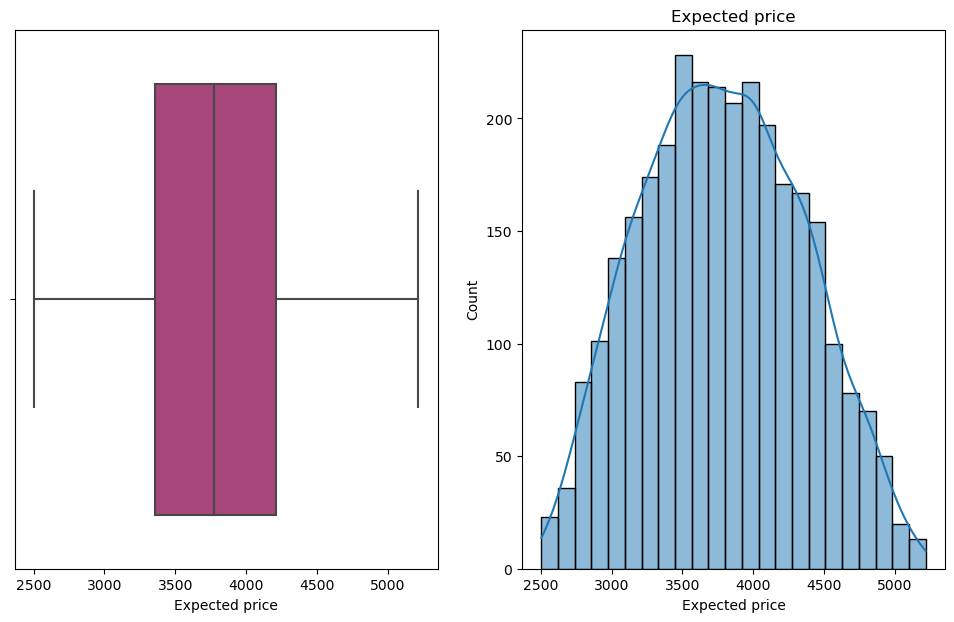

In [46]:
figs,axes = plt.subplots(1,2,figsize=(12,7))
sns.boxplot(data=data_df,x=data_df['Expected price'],palette='magma',ax=axes[0])
sns.histplot(data=data_df,x=data_df['Expected price'],palette='magma',ax=axes[1],kde=True)
plt.title('Expected price')
plt.show()

## $$\;\;\;\;\;\;Bivariate \ Analysis \ of  \ Variables$$

# Analysis of Target vs Dependent 

### Here we will see the realtionship of our target variable with the independent variable

### 1. Expected price vs Grade 

<AxesSubplot:xlabel='Grade', ylabel='Expected price'>

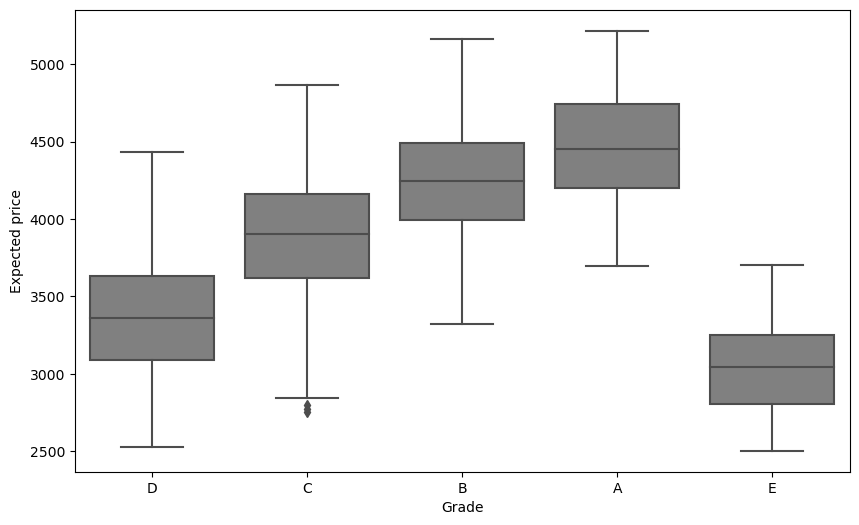

In [47]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data_df,x=data_df['Grade'],y=data_df['Expected price'],color='grey')

### The Grade A type of house will be coming with higher pricetag

### 2. Grade vs Roof(Area)

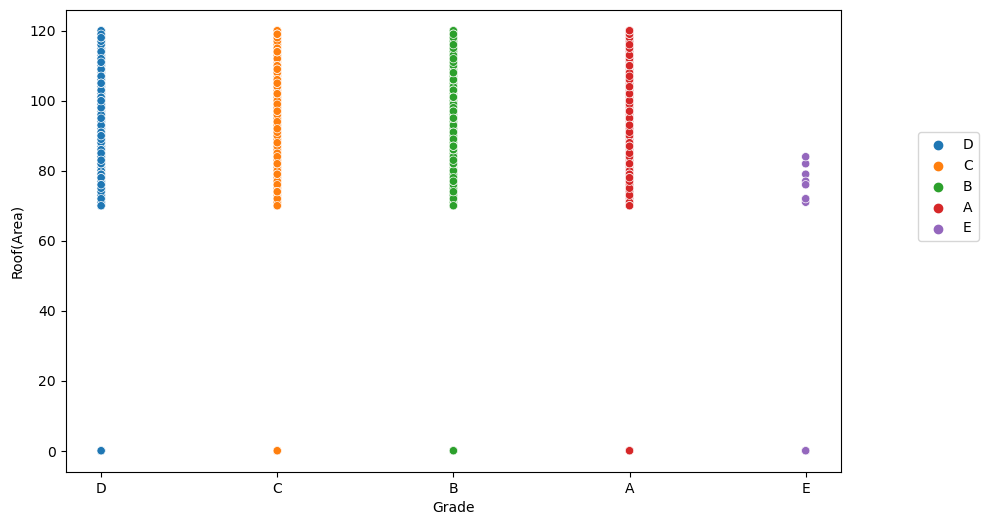

In [48]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=data_df,x=data_df['Grade'],y=data_df['Roof(Area)'],hue='Grade')
plt.legend(loc=(1.1,0.5))
plt.show()


### House Grade E have the least roof area because considering the cost its cheap and its for those who are looking for hosue in budget with lesser facilities .

### 3. Grade  vs Lawn area

<Figure size 1000x600 with 0 Axes>

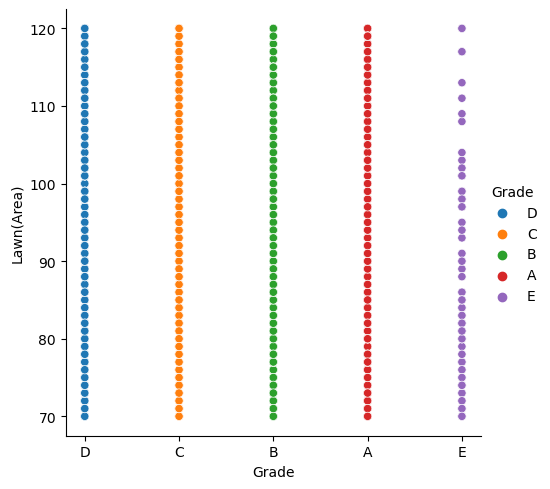

In [49]:
plt.figure(figsize=(10,6))
sns.relplot(data=data_df,x=data_df['Grade'],y=data_df['Lawn(Area)'],hue='Grade')
#plt.legend(loc=(1.1,0.5))
plt.show()


### House Grade E have the less hosues offering higer lawn area because considering the cost its cheap and its for those who are looking for hosue in budget with lesser facilities .

### 4. Grade vs Area

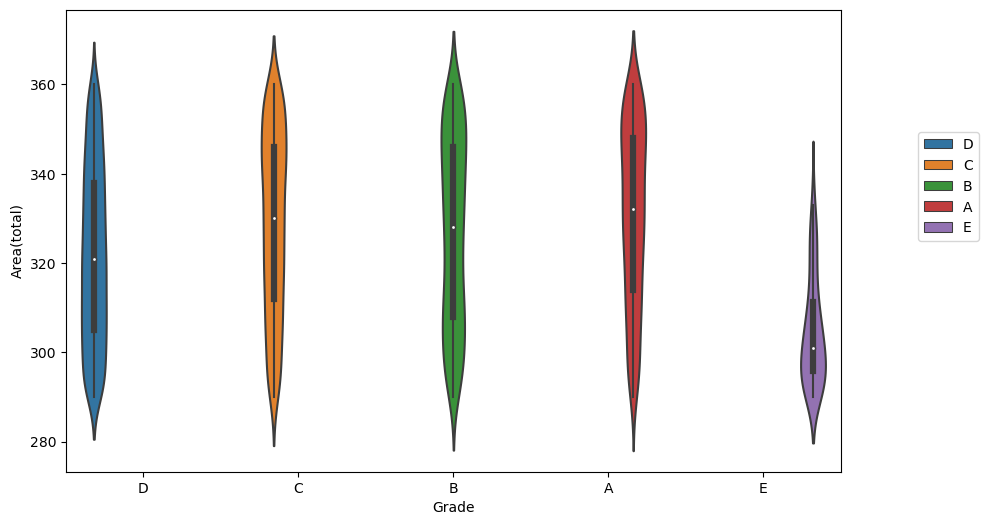

In [50]:
plt.figure(figsize=(10,6))
sns.violinplot(data=data_df,x=data_df['Grade'],y=data_df['Area(total)'],hue='Grade')
plt.legend(loc=(1.1,0.5))
plt.show()


### The House in Grade A offers higher total area and comes with higher price tag and its targeted towards those who are looking for best possible options and where money is not a problem m

### 5. Grade vs API 

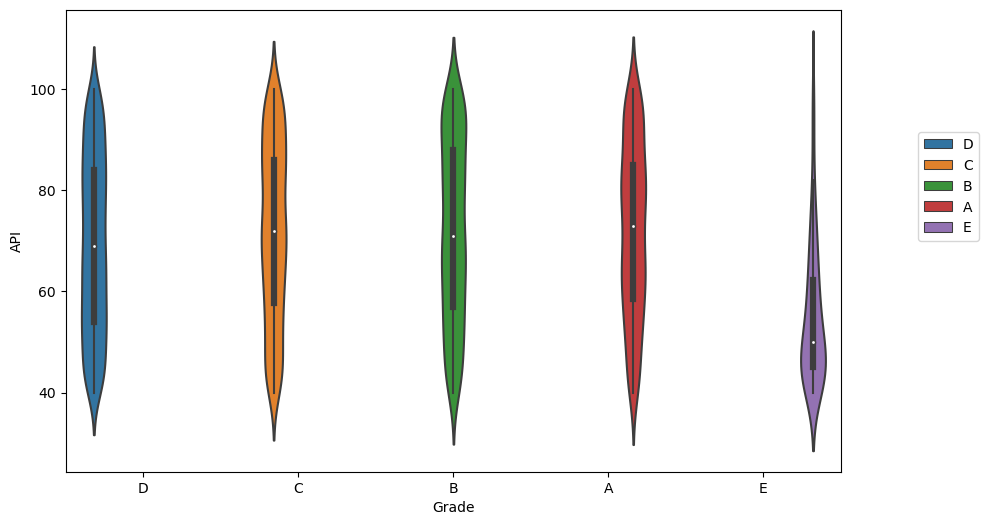

In [51]:
plt.figure(figsize=(10,6))
sns.violinplot(data=data_df,x=data_df['Grade'],y=data_df['API'],hue='Grade')
plt.legend(loc=(1.1,0.5))
plt.show()


### Grade E house offers lesser API , probably because these type of properties are not bases in centre of the city and hence the pollution level is lesser .

### 6. Grade vs Washrooms 

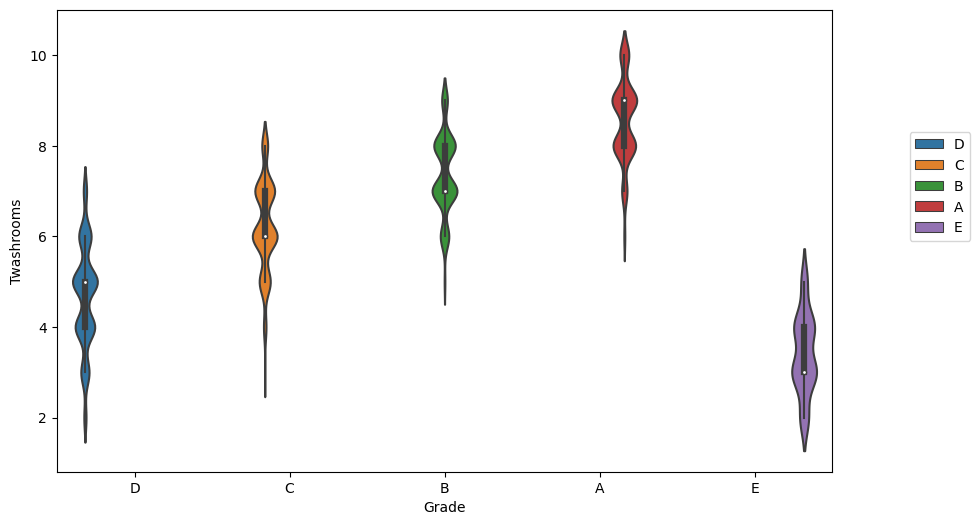

In [52]:
plt.figure(figsize=(10,6))
sns.violinplot(data=data_df,x=data_df['Grade'],y=data_df['Twashrooms'],hue='Grade',inner='box')
plt.legend(loc=(1.1,0.5))
plt.show()


### Again the better the Grade the better the facilities .

### 7. Grade vs Trooms 

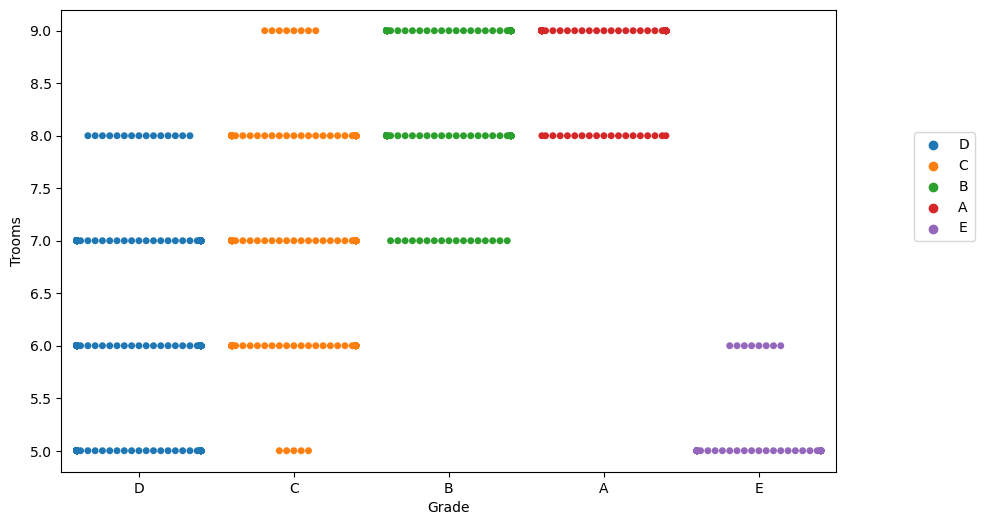

In [53]:
plt.figure(figsize=(10,6))
sns.swarmplot(data=data_df,x=data_df['Grade'],y=data_df['Trooms'],hue='Grade')
plt.legend(loc=(1.1,0.5))
plt.show()

### Again same observation 

### 8. Analysis of Grade vs Nfloors 

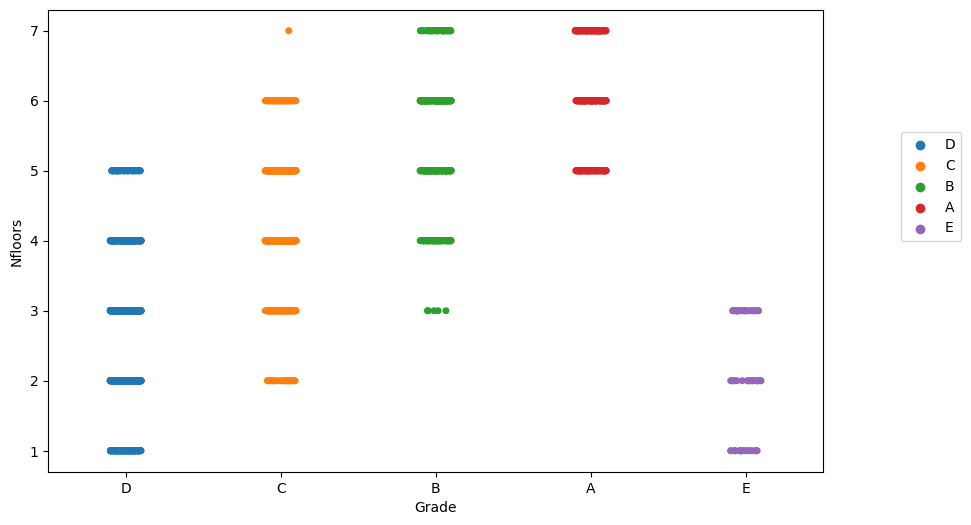

In [54]:
plt.figure(figsize=(10,6))
sns.stripplot(data=data_df,x=data_df['Grade'],y=data_df['Nfloors'],hue='Grade')
plt.legend(loc=(1.1,0.5))
plt.show()

### Here Grade B houses kinda offers good variety of rooms to the customers and comes with a lesser price tag.

## Some Joint Plots to see the data 

### Bedrooms | Grade | Expected Price 

<Figure size 1000x600 with 0 Axes>

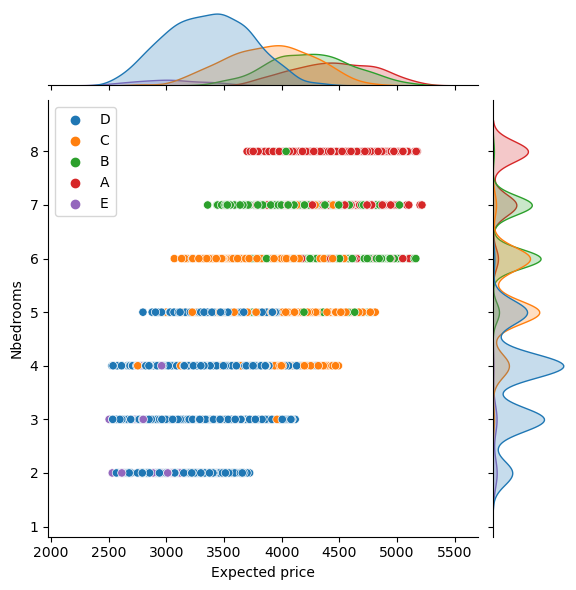

In [55]:
plt.figure(figsize = (10, 6))
sns.jointplot(data=data_df,y='Nbedrooms',x="Expected price",hue='Grade')
plt.legend()

### Area | Grade | Expected Price 

<Figure size 1000x600 with 0 Axes>

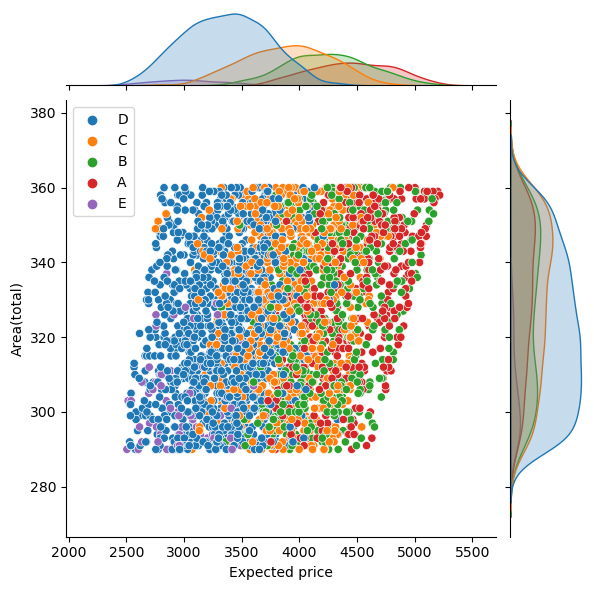

In [56]:
plt.figure(figsize = (10, 6))
sns.jointplot(data=data_df,y='Area(total)',x="Expected price",hue='Grade')
plt.legend()

### Washrooms | Grade | Expected Price 

<Figure size 1000x600 with 0 Axes>

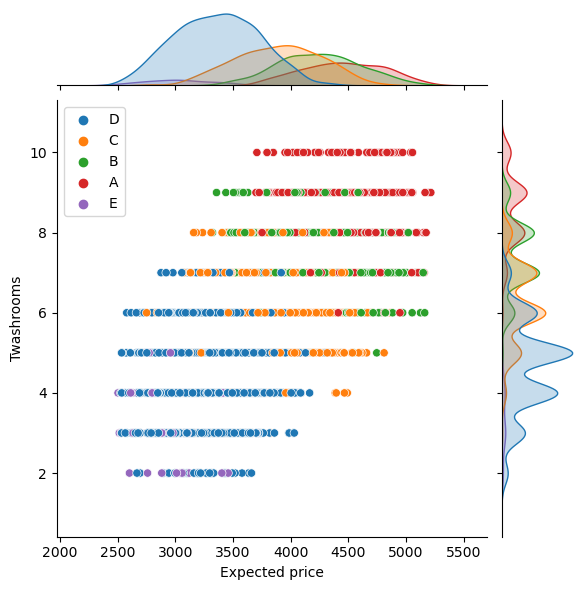

In [57]:
plt.figure(figsize = (10, 6))
sns.jointplot(data=data_df,y='Twashrooms',x="Expected price",hue='Grade')
plt.legend()

# Pair Plot 

<Figure size 2000x1200 with 0 Axes>

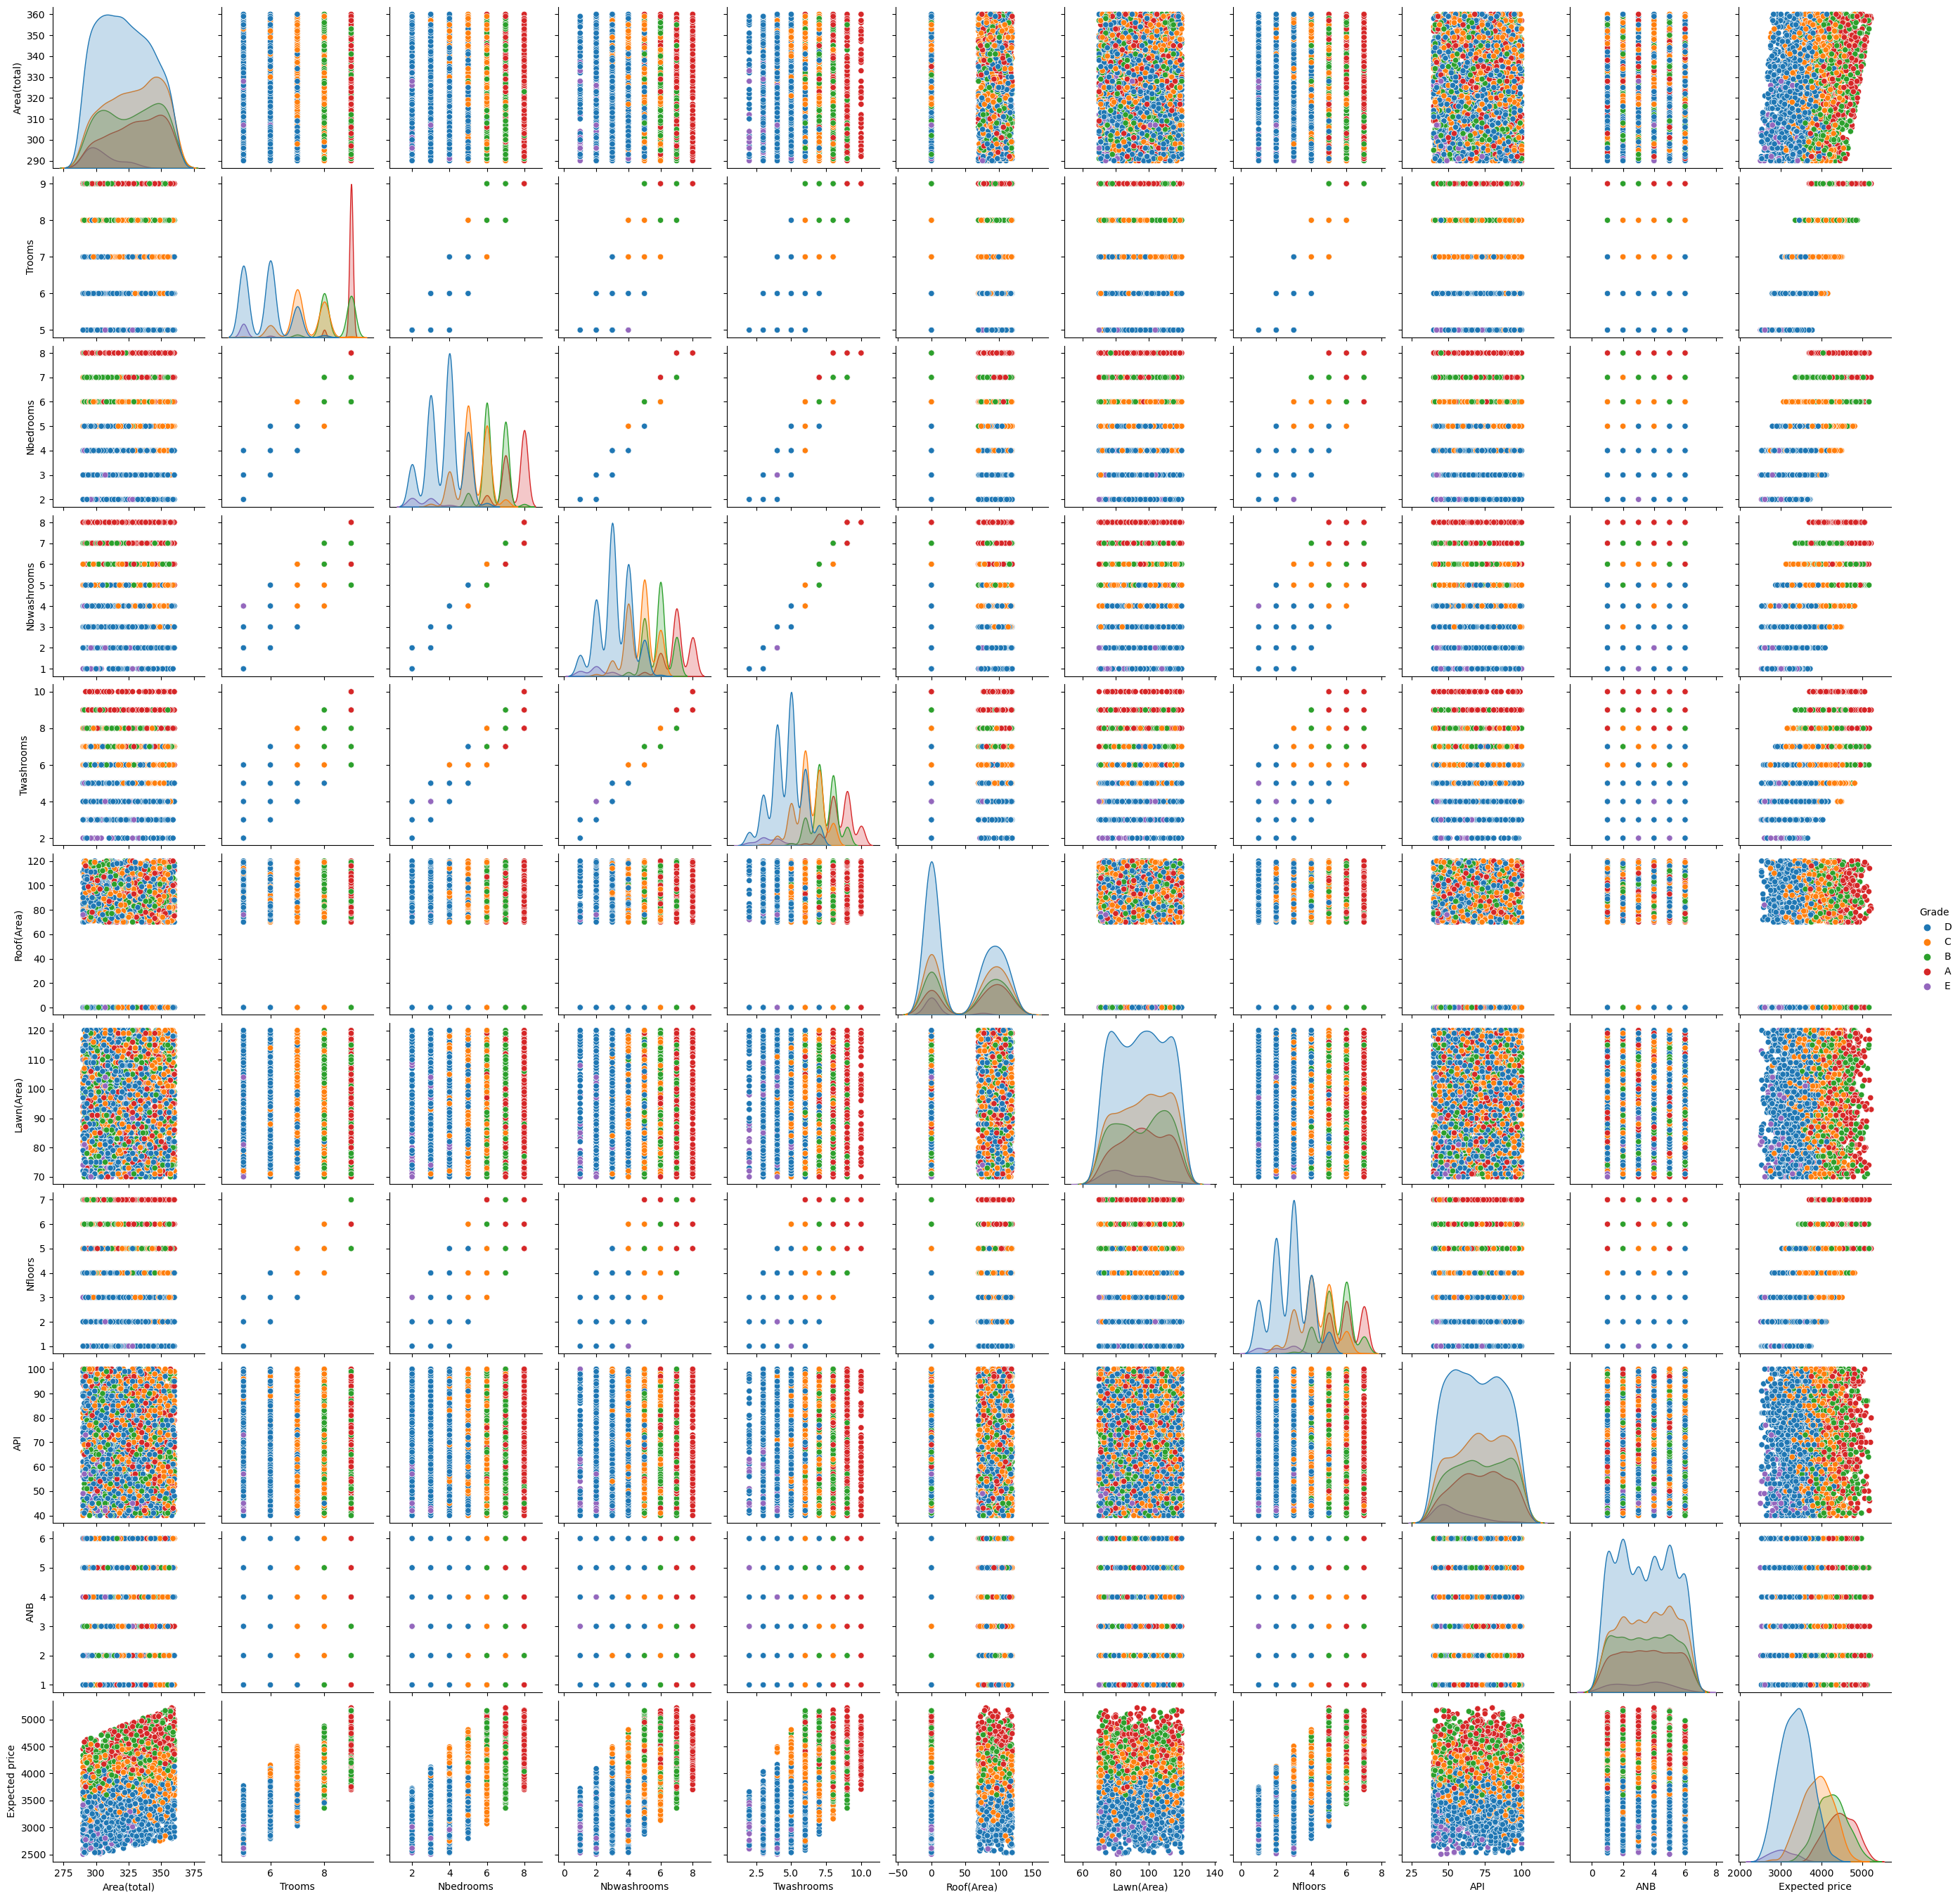

In [58]:
plt.figure(figsize=(20,12))
sns.pairplot(data=data_df,hue='Grade')
plt.show()

### Here we doesnt find any business insights so we will see the pairplot with our Target Variable :

In [59]:
#sns.pairplot(data=data_df,y=data_df['Grade'],x=data_df.drop(columns='Grade'));

TypeError: pairplot() got an unexpected keyword argument 'y'

# Data Transformation  

## Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

In [ ]:
data_df['Grade']=label.fit_transform(data_df['Grade'])
data_df['roof']=label.fit_transform(data_df['roof'])
data_df.head()

Area(total)  Trooms  Nbedrooms  Nbwashrooms  Twashrooms  roof  Roof(Area)  \
0          339       6          5            4           6     0           0   
1          358       5          4            3           4     1          71   
2          324       7          5            4           5     1         101   
3          330       6          4            3           5     1         101   
4          320       7          4            4           5     0           0   

   Lawn(Area)  Nfloors  API  ANB  Expected price  Grade  
0          76        2   79    6            3481      3  
1          96        3   72    4            3510      3  
2         117        5   64    3            3748      2  
3          82        2   59    2            3134      3  
4          75        3   40    1            3843      3

## Corelation of Columns with respect to target Varaible : 

In [ ]:
corr=data_df.corr()['Grade'].sort_values(ascending=True)
corr

Trooms           -0.875145
Nbedrooms        -0.865389
Nbwashrooms      -0.847319
Twashrooms       -0.819280
Nfloors          -0.787623
Expected price   -0.760820
Area(total)      -0.177332
Roof(Area)       -0.170259
roof             -0.166635
API              -0.099000
Lawn(Area)       -0.051200
ANB              -0.024025
Grade             1.000000
Name: Grade, dtype: float64

## Heatmap 

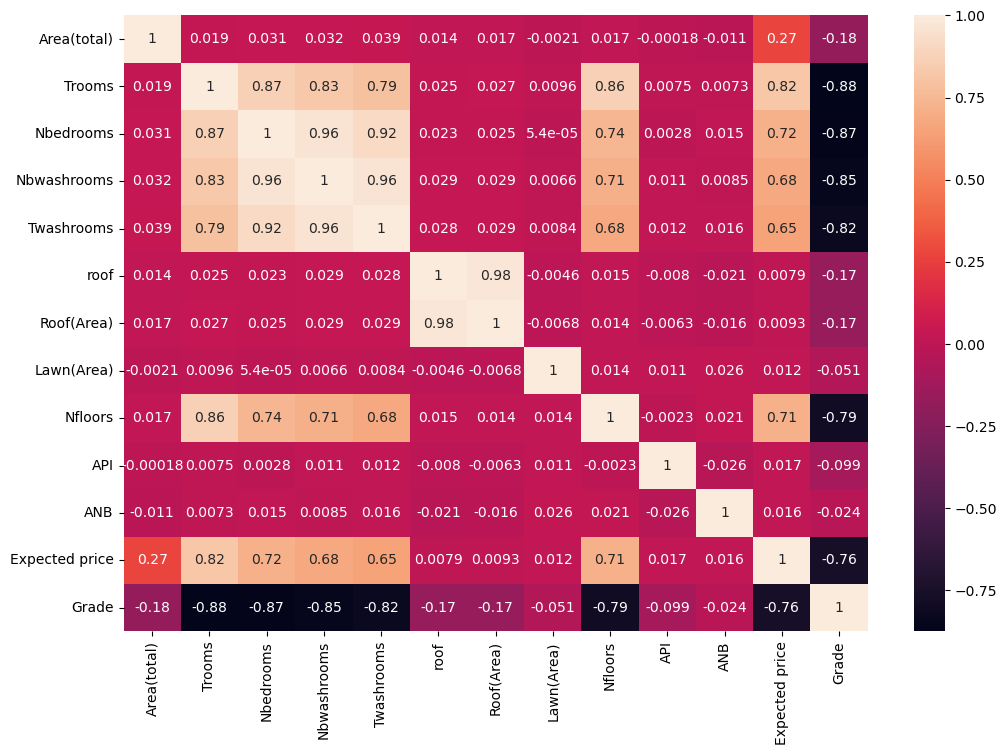

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(data_df.corr(),annot=True)
plt.show()

# Business Report according to above EDA 

#### We Saw that the number of rooms ,washrooms , API , No of flooors and the expected price of the property plays a import role in classifying the houses into different grades .

#### Grade A being premium and Grade E being budget option. 

#### The Property Rates in Grade A houses are higher wheres as the Grade B and Grade c houses offers almost similar facilities in lesser price so that can be taken as one option for those looking for a slight cheaper.

#### Grade A houses offers poor API , hinting being in the city centre and accessible to many business options and city services.

#### Grade E houses are for those considering cheap house and these houses offer a good API so someone who's medical diagnosed can opt for them .

#### The facilities increases the price.


# Data Processing for Classification Modela.

#### Scaling of Data 
#### Test | Train Split 

## Test | Train Split 

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=data_df.drop(columns='Grade')
y=data_df['Grade']

## Scaling the dependent data that would give the prediction .

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scale=StandardScaler()

In [ ]:
X1=X.copy()
X2=scale.fit_transform(X1)
X=pd.DataFrame(X2,columns=X1.columns)
X.head()

Area(total)    Trooms  Nbedrooms  Nbwashrooms  Twashrooms      roof  \
0     0.677077 -0.718985  -0.014071    -0.299518   -0.005973 -1.029090   
1     1.603710 -1.422722  -0.625854    -0.882616   -1.125895  0.971733   
2    -0.054476 -0.015248  -0.014071    -0.299518   -0.565934  0.971733   
3     0.238145 -0.718985  -0.625854    -0.882616   -0.565934  0.971733   
4    -0.249557 -0.015248  -0.625854    -0.299518   -0.565934 -1.029090   

   Roof(Area)  Lawn(Area)   Nfloors       API       ANB  Expected price  
0   -1.004968   -1.321837 -1.241831  0.501655  1.488214       -0.532429  
1    0.451785    0.026334 -0.625028  0.103034  0.307560       -0.481292  
2    1.067315    1.441914  0.608580 -0.352533 -0.282766       -0.061609  
3    1.067315   -0.917385 -1.241831 -0.637262 -0.873093       -1.144319  
4   -1.004968   -1.389245 -0.625028 -1.719234 -1.463420        0.105911

## Spliting the Data

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=7)
print(x_train.shape)
print(x_test.shape)


(2100, 12)
(900, 12)


# Model Making and Evaluating their Performances 

### We will Evaluate different models and choose the model that will give the best accuracy in classifying our data 

In [ ]:
names=[]
result=[]
roc=[]

### Ploting the target and One of the independent variables

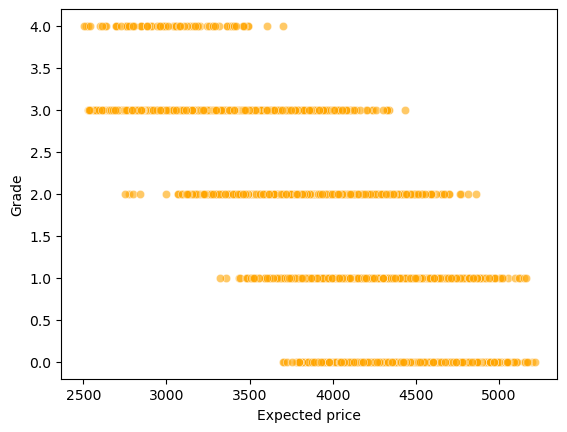

In [ ]:
sns.scatterplot(data=data_df,y='Grade',x='Expected price',alpha=0.6,color='orange');

### We can Comprehend that the Target Variable is in 5 Class so we would apply Classification Models .

# Model 1 : Logistic Regression 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score,roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

In [ ]:
model_logictic=LogisticRegression()
names.append(model_logictic)

#### Logistic Regression is a supervised learning model which classifies the data into classes after learning from set of observation  .
#### Its based on probability.
#### Its transforms its output using the logistic sigmoid function to return a probability Value.

## Training model , Prediction , and printing unique Classification : 

In [ ]:
model_logictic.fit(x_train,y_train)

y_log=model_logictic.predict(x_test)

np.unique(y_log)

array([0, 1, 2, 3, 4])

In [ ]:
# Intercept and Coefficients

In [ ]:
print('The Intercept is :',model_logictic.intercept_)

The Intercept is : [-13.27806186   2.29353732   8.95966114   6.77561166  -4.75074827]


In [ ]:
model_logictic.coef_

array([[ 3.09283474,  6.43116572,  4.86741978,  3.43031491,  2.71382711,
         1.13487939,  2.18329198,  0.89069617,  3.83770916,  2.2040924 ,
         0.28782744,  1.08316854],
       [ 1.8351513 ,  3.20405216,  1.56124206,  1.44455275,  1.02464763,
         0.83082384,  0.93806245,  0.49174089,  1.43881228,  1.33195359,
         0.13108511,  0.40109485],
       [ 0.51522866, -0.62259797, -0.52798839,  0.02738814, -0.34725867,
        -0.07440948,  0.44510272,  0.09471175, -0.46076502,  0.46285177,
         0.09120881,  0.026936  ],
       [-1.7135525 , -4.26301557, -2.26213606, -2.0003645 , -1.32345319,
        -0.3655508 , -1.29831106, -0.44811436, -2.08118473, -1.04910838,
        -0.18898346, -0.48650259],
       [-3.72966221, -4.74960434, -3.63853738, -2.9018913 , -2.06776288,
        -1.52574296, -2.26814609, -1.02903446, -2.73457169, -2.94978937,
        -0.3211379 , -1.0246968 ]])

### The Score (efficiency of the model) :

In [ ]:
print('The Score of Model on Training Dataset : ',model_logictic.score(x_train,y_train))

The Score of Model on Training Dataset :  0.9619047619047619


In [ ]:
result.append(model_logictic.score(x_test,y_test))
print('The Score of Model on Testing Dataset : ',model_logictic.score(x_test,y_test))

The Score of Model on Testing Dataset :  0.9377777777777778


In [ ]:
print('The Accuracy Score of the Model : ',round(accuracy_score(y_test,y_log),4)*100,'%')

The Accuracy Score of the Model :  93.78 %


### Count Each Class Predictions :

In [ ]:
## Counting Each Classes :

from collections import Counter

x=0,1,2,3,4

count=Counter(y_log)

for i in x:
    print('Class {0} : {1} '.format(i,count[i]))

Class 0 : 126 
Class 1 : 147 
Class 2 : 192 
Class 3 : 411 
Class 4 : 24 


### Confusion Matrix and Plot 

[[114   4   0   0   0]
 [ 12 135   4   0   0]
 [  0   8 180   5   0]
 [  0   0   8 394   3]
 [  0   0   0  12  21]]

 Plot of Confusion Matrix : 



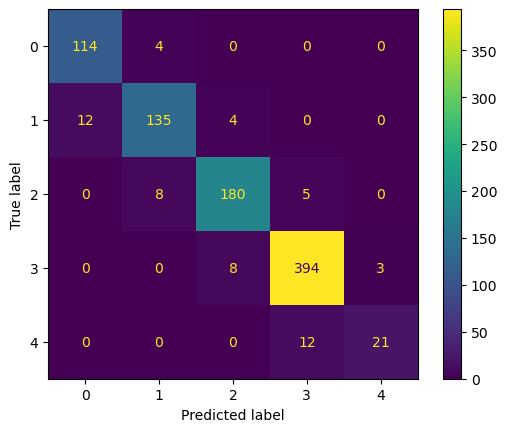

In [ ]:
print(confusion_matrix(y_test,y_log))

print('\n Plot of Confusion Matrix : \n')
plot_confusion_matrix(model_logictic,x_test,y_test)
plt.show()

### Classification Report

In [ ]:
print(classification_report(y_test,y_log))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       118
           1       0.92      0.89      0.91       151
           2       0.94      0.93      0.94       193
           3       0.96      0.97      0.97       405
           4       0.88      0.64      0.74        33

    accuracy                           0.94       900
   macro avg       0.92      0.88      0.90       900
weighted avg       0.94      0.94      0.94       900



### ROC_AUC Score 

 ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes and its best used for the binary classifications .

### The Coefficient for different Class for different Features .

In [ ]:
pd.DataFrame(model_logictic.coef_,columns=X.columns)

Area(total)    Trooms  Nbedrooms  Nbwashrooms  Twashrooms      roof  \
0     3.092835  6.431166   4.867420     3.430315    2.713827  1.134879   
1     1.835151  3.204052   1.561242     1.444553    1.024648  0.830824   
2     0.515229 -0.622598  -0.527988     0.027388   -0.347259 -0.074409   
3    -1.713552 -4.263016  -2.262136    -2.000365   -1.323453 -0.365551   
4    -3.729662 -4.749604  -3.638537    -2.901891   -2.067763 -1.525743   

   Roof(Area)  Lawn(Area)   Nfloors       API       ANB  Expected price  
0    2.183292    0.890696  3.837709  2.204092  0.287827        1.083169  
1    0.938062    0.491741  1.438812  1.331954  0.131085        0.401095  
2    0.445103    0.094712 -0.460765  0.462852  0.091209        0.026936  
3   -1.298311   -0.448114 -2.081185 -1.049108 -0.188983       -0.486503  
4   -2.268146   -1.029034 -2.734572 -2.949789 -0.321138       -1.024697

### For predicting the Grade A houses :

##### These features highly impact the classification :

In [ ]:
pd.DataFrame(model_logictic.coef_[0].reshape(-1,1),columns=['Coefficient'],index=X.columns).sort_values(by='Coefficient',ascending=False)

Coefficient
Trooms             6.431166
Nbedrooms          4.867420
Nfloors            3.837709
Nbwashrooms        3.430315
Area(total)        3.092835
Twashrooms         2.713827
API                2.204092
Roof(Area)         2.183292
roof               1.134879
Expected price     1.083169
Lawn(Area)         0.890696
ANB                0.287827

### Histogram Plot of Prediction of Logistic Regression :

<AxesSubplot:ylabel='Count'>

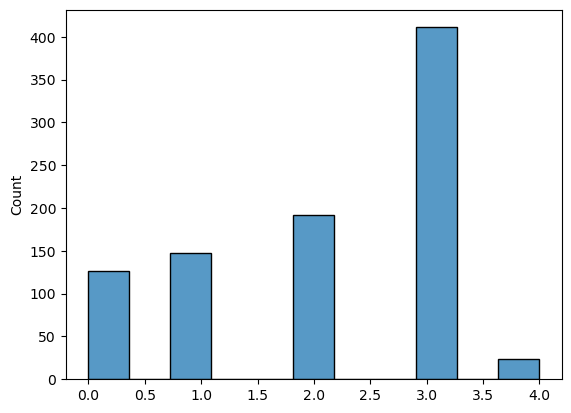

In [ ]:
sns.histplot(y_log)

#### Histogram of Probability Prediction : 

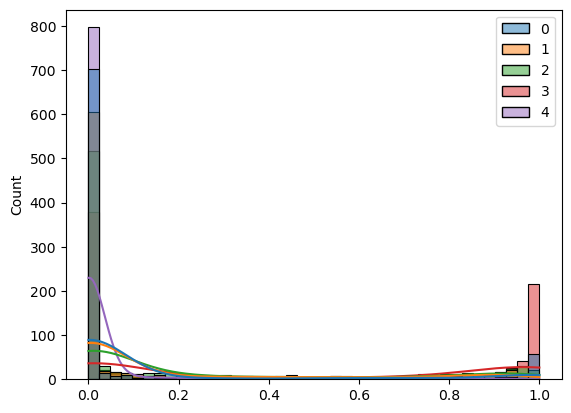

In [ ]:
y_log_prob=model_logictic.predict_proba(x_test)
sns.histplot(y_log_prob,kde=True)

plt.show()

# Model 2 : Decision Tree 

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model_decision=DecisionTreeClassifier()

In [ ]:
names.append(model_decision)

#### Training model , Prediction , and printing unique Classification : 

In [ ]:
model_decision.fit(x_train,y_train)

y_dec=model_decision.predict(x_test)

np.unique(y_dec)

array([0, 1, 2, 3, 4])

### The Score (efficiency of the model) :

In [ ]:
print('The Score of Model on Training Dataset : ',model_decision.score(x_train,y_train))

The Score of Model on Training Dataset :  1.0


In [ ]:
result.append(model_decision.score(x_test,y_test))
print('The Score of Model on Testing Dataset : ',model_decision.score(x_test,y_test))

The Score of Model on Testing Dataset :  0.8522222222222222


In [ ]:
print('The Accuracy Score of the Model : ',round(accuracy_score(y_test,y_dec),4)*100,'%')

The Accuracy Score of the Model :  85.22 %


### Count Each Class Predictions :

In [ ]:
## Counting Each Classes :

from collections import Counter

x=0,1,2,3,4

count=Counter(y_dec)

for i in x:
    print('Class {0} : {1} '.format(i,count[i]))

Class 0 : 129 
Class 1 : 149 
Class 2 : 178 
Class 3 : 414 
Class 4 : 30 


### Feature Importances 

In [ ]:
model_decision.feature_importances_

array([0.12033892, 0.43944289, 0.03887503, 0.13485687, 0.01508147,
       0.0335439 , 0.07044657, 0.0328672 , 0.02409865, 0.05525744,
       0.00929881, 0.02589225])

In [ ]:
pd.DataFrame(model_decision.feature_importances_,index=X.columns,columns=['Feature Importances']).sort_values(by='Feature Importances',ascending=False)

Feature Importances
Trooms                     0.439443
Nbwashrooms                0.134857
Area(total)                0.120339
Roof(Area)                 0.070447
API                        0.055257
Nbedrooms                  0.038875
roof                       0.033544
Lawn(Area)                 0.032867
Expected price             0.025892
Nfloors                    0.024099
Twashrooms                 0.015081
ANB                        0.009299

#### These Top 3 Features are the fetaures which contibutes to more in classifying the house 

### Confusion Matrix and Plot 

[[110   8   0   0   0]
 [ 19 122  10   0   0]
 [  0  19 144  30   0]
 [  0   0  24 371  10]
 [  0   0   0  13  20]]

 Plot of Confusion Matrix : 



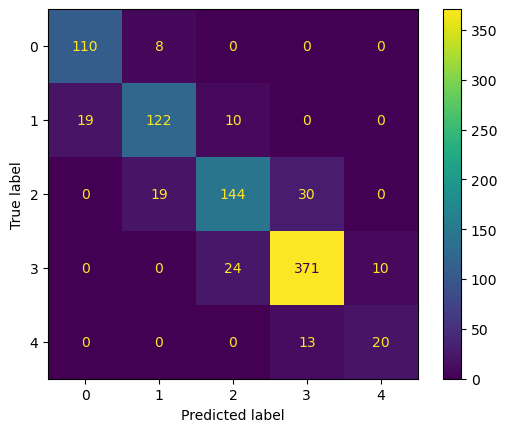

In [ ]:
print(confusion_matrix(y_test,y_dec))

print('\n Plot of Confusion Matrix : \n')
plot_confusion_matrix(model_decision,x_test,y_test)
plt.show()

### Classification Report

In [ ]:
print(classification_report(y_test,y_dec))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       118
           1       0.82      0.81      0.81       151
           2       0.81      0.75      0.78       193
           3       0.90      0.92      0.91       405
           4       0.67      0.61      0.63        33

    accuracy                           0.85       900
   macro avg       0.81      0.80      0.80       900
weighted avg       0.85      0.85      0.85       900



### Plotting Decsion Tree :

In [ ]:
from sklearn.tree import plot_tree

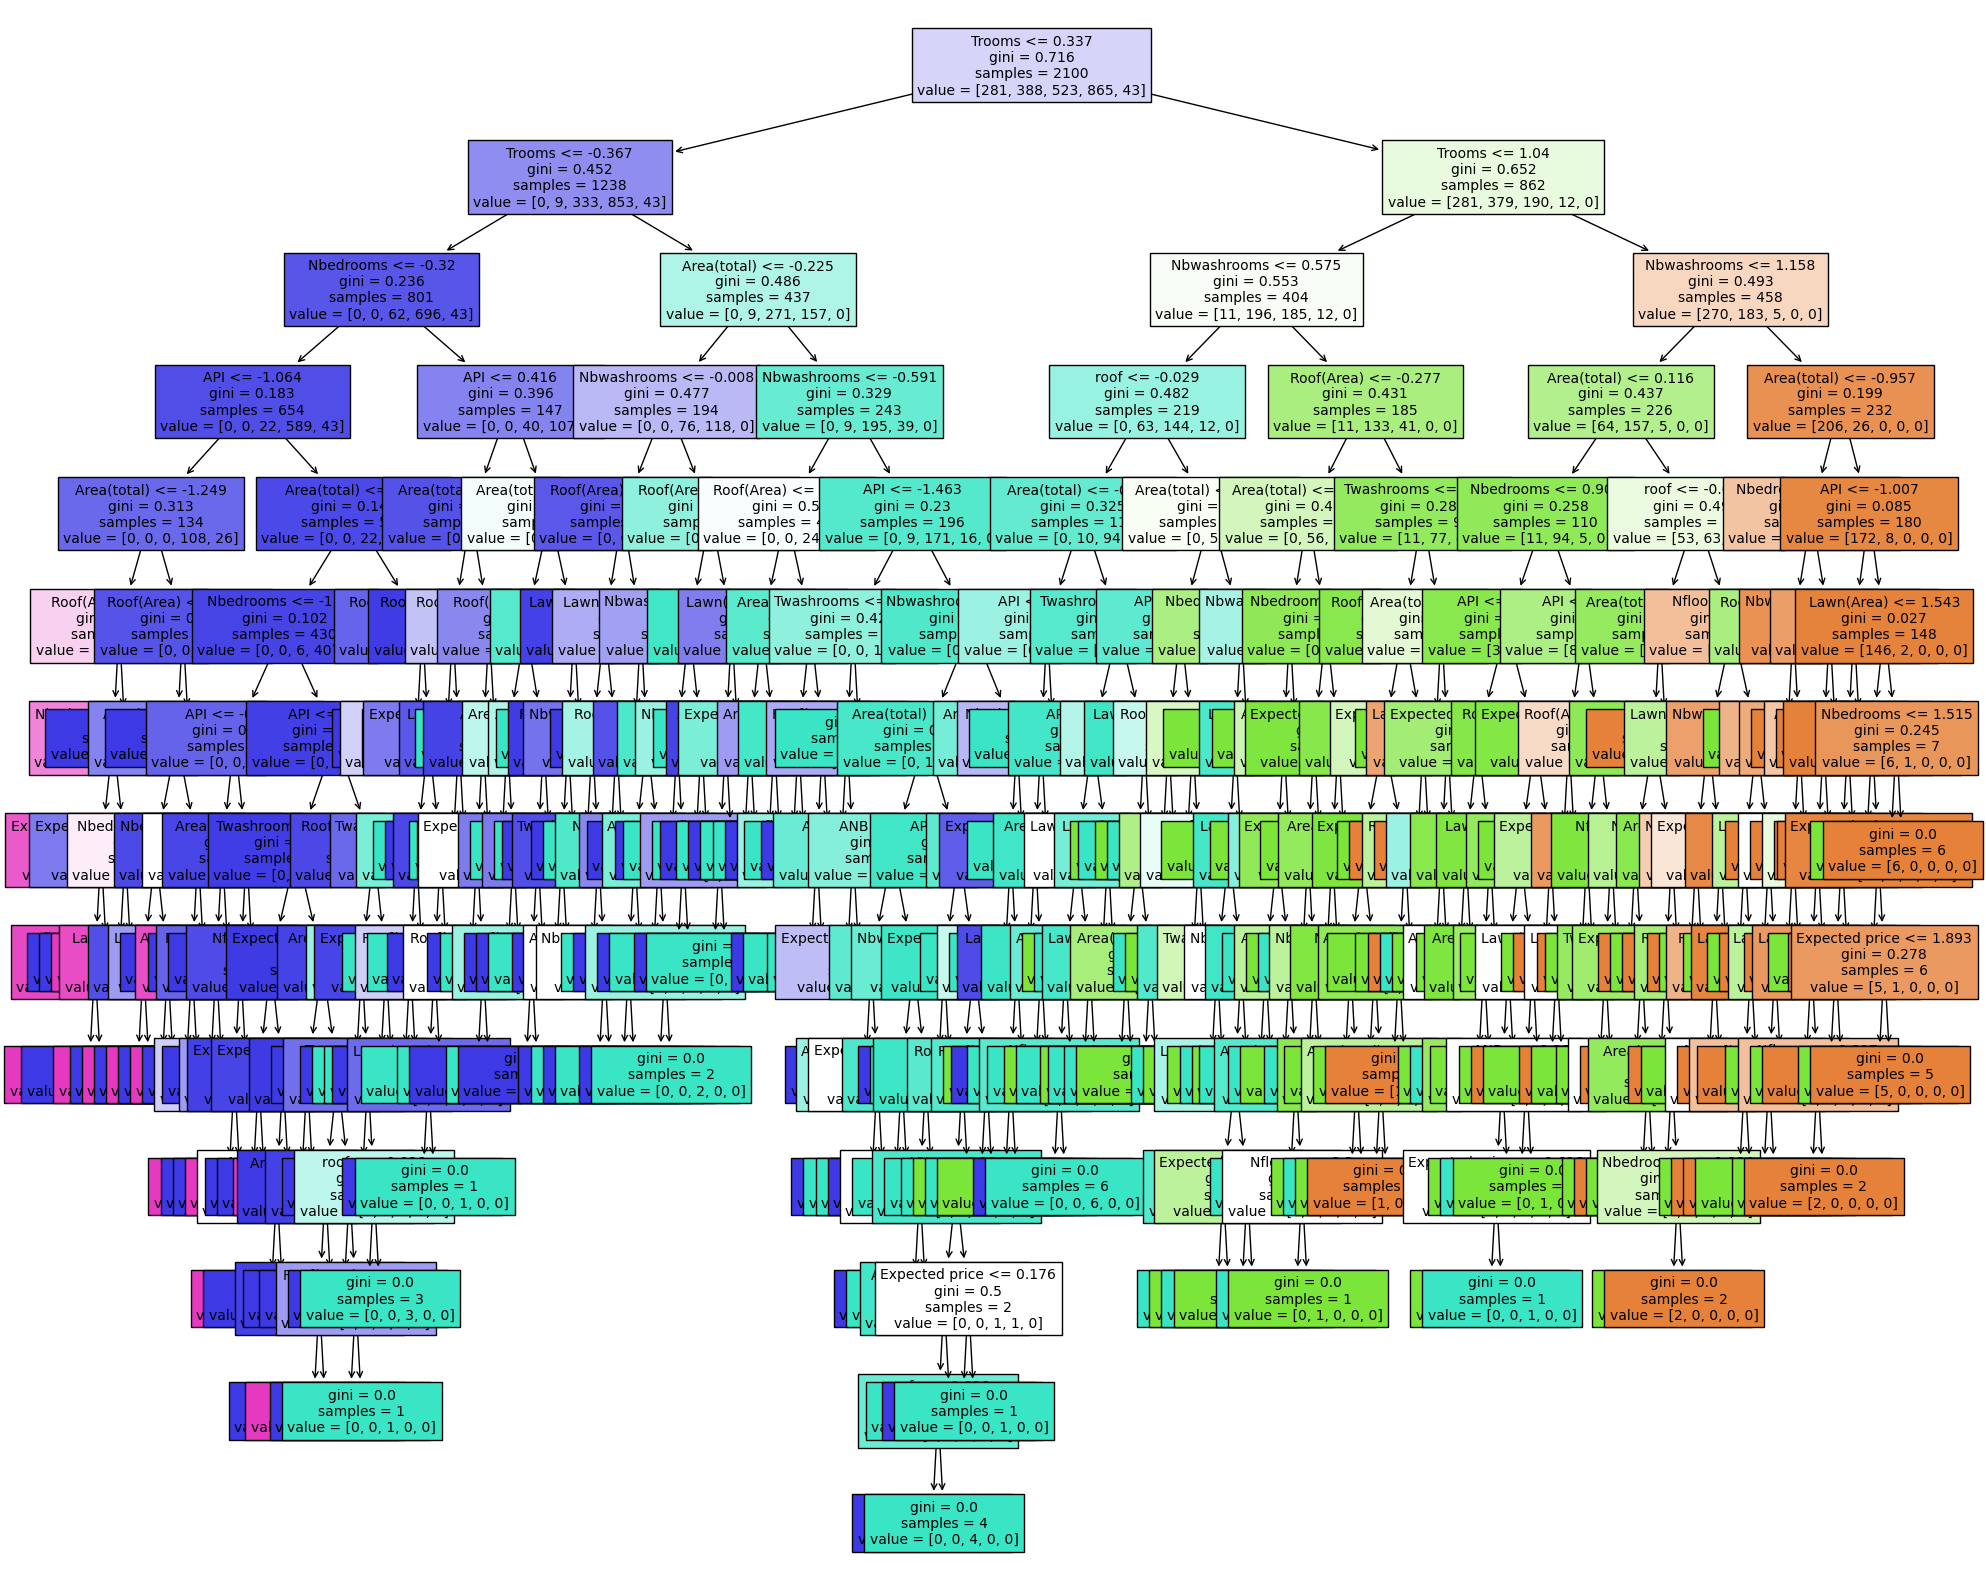

In [ ]:
plt.figure(figsize=(20,16))
plot_tree(model_decision,fontsize=10,feature_names=X.columns,filled=True)
plt.tight_layout()
plt.show()

# Model 3: Naive Bayes ( GuassianNB  )

In [ ]:
from sklearn.naive_bayes import GaussianNB 

In [ ]:
model_naive=GaussianNB()

In [ ]:
names.append(model_naive)

## Training model , Prediction , and printing unique Classification : 

In [ ]:
model_naive.fit(x_train,y_train)

y_naive=model_naive.predict(x_test)

np.unique(y_naive)

array([0, 1, 2, 3, 4])

### The Score (efficiency of the model) :

In [ ]:
print('The Score of Model on Training Dataset : ',model_naive.score(x_train,y_train))

The Score of Model on Training Dataset :  0.8138095238095238


In [ ]:
result.append(model_naive.score(x_test,y_test))
print('The Score of Model on Testing Dataset : ',model_naive.score(x_test,y_test))

The Score of Model on Testing Dataset :  0.7988888888888889


In [ ]:
print('The Accuracy Score of the Model : ',round(accuracy_score(y_test,y_naive),4)*100,'%')

The Accuracy Score of the Model :  79.89 %


### Count Each Class Predictions :

In [ ]:
## Counting Each Classes :

from collections import Counter

x=0,1,2,3,4

count=Counter(y_naive)

for i in x:
    print('Class {0} : {1} '.format(i,count[i]))

Class 0 : 116 
Class 1 : 181 
Class 2 : 199 
Class 3 : 370 
Class 4 : 34 


### Confusion Matrix and Plot 

[[104  14   0   0   0]
 [ 12 125  14   0   0]
 [  0  42 130  21   0]
 [  0   0  55 338  12]
 [  0   0   0  11  22]]

 Plot of Confusion Matrix : 



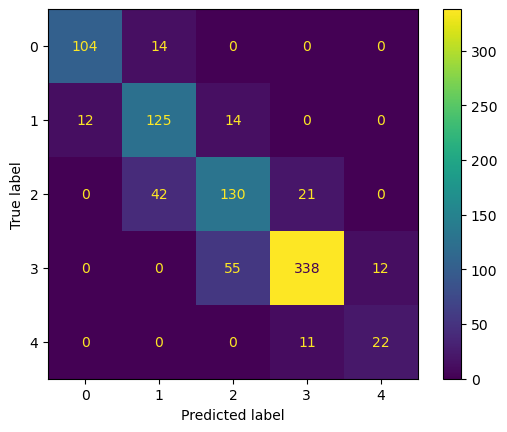

In [ ]:
print(confusion_matrix(y_test,y_naive))

print('\n Plot of Confusion Matrix : \n')
plot_confusion_matrix(model_naive,x_test,y_test)
plt.show()

### Classification Report

In [ ]:
print(classification_report(y_test,y_naive))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       118
           1       0.69      0.83      0.75       151
           2       0.65      0.67      0.66       193
           3       0.91      0.83      0.87       405
           4       0.65      0.67      0.66        33

    accuracy                           0.80       900
   macro avg       0.76      0.78      0.77       900
weighted avg       0.81      0.80      0.80       900



## Feature Importances 

In [ ]:
from sklearn.inspection import permutation_importance

In [ ]:
importance=permutation_importance(model_naive,x_test,y_test)
importance

{'importances_mean': array([0.01733333, 0.18688889, 0.12355556, 0.08377778, 0.04066667,
        0.00022222, 0.00911111, 0.00288889, 0.04288889, 0.00977778,
        0.00311111, 0.02333333]),
 'importances_std': array([0.00528683, 0.00977273, 0.01309792, 0.01363728, 0.01048456,
        0.00266667, 0.00215452, 0.0020608 , 0.00590459, 0.00293131,
        0.00275771, 0.00620633]),
 'importances': array([[ 0.02555556,  0.02111111,  0.01333333,  0.01555556,  0.01111111],
        [ 0.17111111,  0.18111111,  0.19666667,  0.19666667,  0.18888889],
        [ 0.10888889,  0.12444444,  0.14111111,  0.13444444,  0.10888889],
        [ 0.09111111,  0.08555556,  0.10111111,  0.08111111,  0.06      ],
        [ 0.04      ,  0.04333333,  0.05111111,  0.04777778,  0.02111111],
        [ 0.00555556, -0.00111111, -0.00111111, -0.00111111, -0.00111111],
        [ 0.01111111,  0.01111111,  0.00777778,  0.00555556,  0.01      ],
        [ 0.00444444,  0.00333333,  0.00111111,  0.        ,  0.00555556],
      

In [ ]:
pd.DataFrame(importance.importances_mean,index=X.columns,columns=['Importances']).sort_values(by='Importances',ascending=False)

Importances
Trooms             0.186889
Nbedrooms          0.123556
Nbwashrooms        0.083778
Nfloors            0.042889
Twashrooms         0.040667
Expected price     0.023333
Area(total)        0.017333
API                0.009778
Roof(Area)         0.009111
ANB                0.003111
Lawn(Area)         0.002889
roof               0.000222

# 4. Random Forest 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

In [ ]:
model_random=RandomForestClassifier()

In [ ]:
names.append(model_random)

#### Training model , Prediction , and printing unique Classification : 

In [ ]:
model_random.fit(x_train,y_train)

y_rand=model_random.predict(x_test)

np.unique(y_rand)

array([0, 1, 2, 3, 4])

### The Score (efficiency of the model) :

In [ ]:
print('The Score of Model on Training Dataset : ',model_random.score(x_train,y_train))

The Score of Model on Training Dataset :  1.0


In [ ]:
result.append(model_random.score(x_test,y_test))
print('The Score of Model on Testing Dataset : ',model_random.score(x_test,y_test))

The Score of Model on Testing Dataset :  0.9066666666666666


In [ ]:
print('The Accuracy Score of the Model : ',round(accuracy_score(y_test,y_rand),4)*100,'%')

The Accuracy Score of the Model :  90.67 %


### Count Each Class Predictions :

In [ ]:
## Counting Each Classes :

from collections import Counter

x=0,1,2,3,4

count=Counter(y_rand)

for i in x:
    print('Class {0} : {1} '.format(i,count[i]))

Class 0 : 115 
Class 1 : 156 
Class 2 : 191 
Class 3 : 424 
Class 4 : 14 


## Feature Importances :

In [ ]:
model_random.feature_importances_

array([0.09128636, 0.20329105, 0.15963798, 0.0997724 , 0.07545296,
       0.02669084, 0.04819025, 0.04461055, 0.06772985, 0.06359876,
       0.02303171, 0.0967073 ])

In [ ]:
model_random.base_estimator_

DecisionTreeClassifier()

In [ ]:
pd.DataFrame(model_random.feature_importances_,index=X.columns,columns=['Feature Importances']).sort_values(by='Feature Importances',ascending=False)

Feature Importances
Trooms                     0.203291
Nbedrooms                  0.159638
Nbwashrooms                0.099772
Expected price             0.096707
Area(total)                0.091286
Twashrooms                 0.075453
Nfloors                    0.067730
API                        0.063599
Roof(Area)                 0.048190
Lawn(Area)                 0.044611
roof                       0.026691
ANB                        0.023032

### Confusion Matrix and Plot 

[[109   9   0   0   0]
 [  6 137   8   0   0]
 [  0  10 168  15   0]
 [  0   0  15 389   1]
 [  0   0   0  20  13]]

 Plot of Confusion Matrix : 



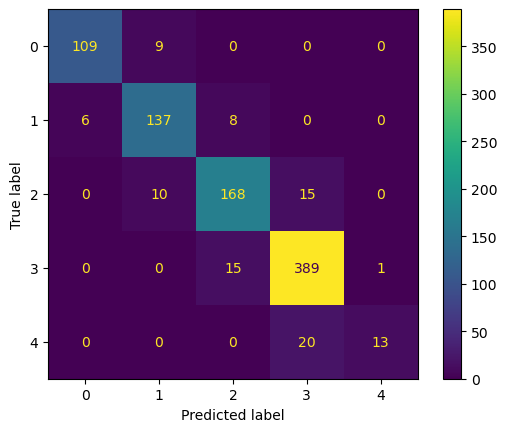

In [ ]:
print(confusion_matrix(y_test,y_rand))

print('\n Plot of Confusion Matrix : \n')
plot_confusion_matrix(model_random,x_test,y_test)
plt.show()

### Classification Report

In [ ]:
print(classification_report(y_test,y_rand))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94       118
           1       0.88      0.91      0.89       151
           2       0.88      0.87      0.88       193
           3       0.92      0.96      0.94       405
           4       0.93      0.39      0.55        33

    accuracy                           0.91       900
   macro avg       0.91      0.81      0.84       900
weighted avg       0.91      0.91      0.90       900



### Plotting Decsion Tree :

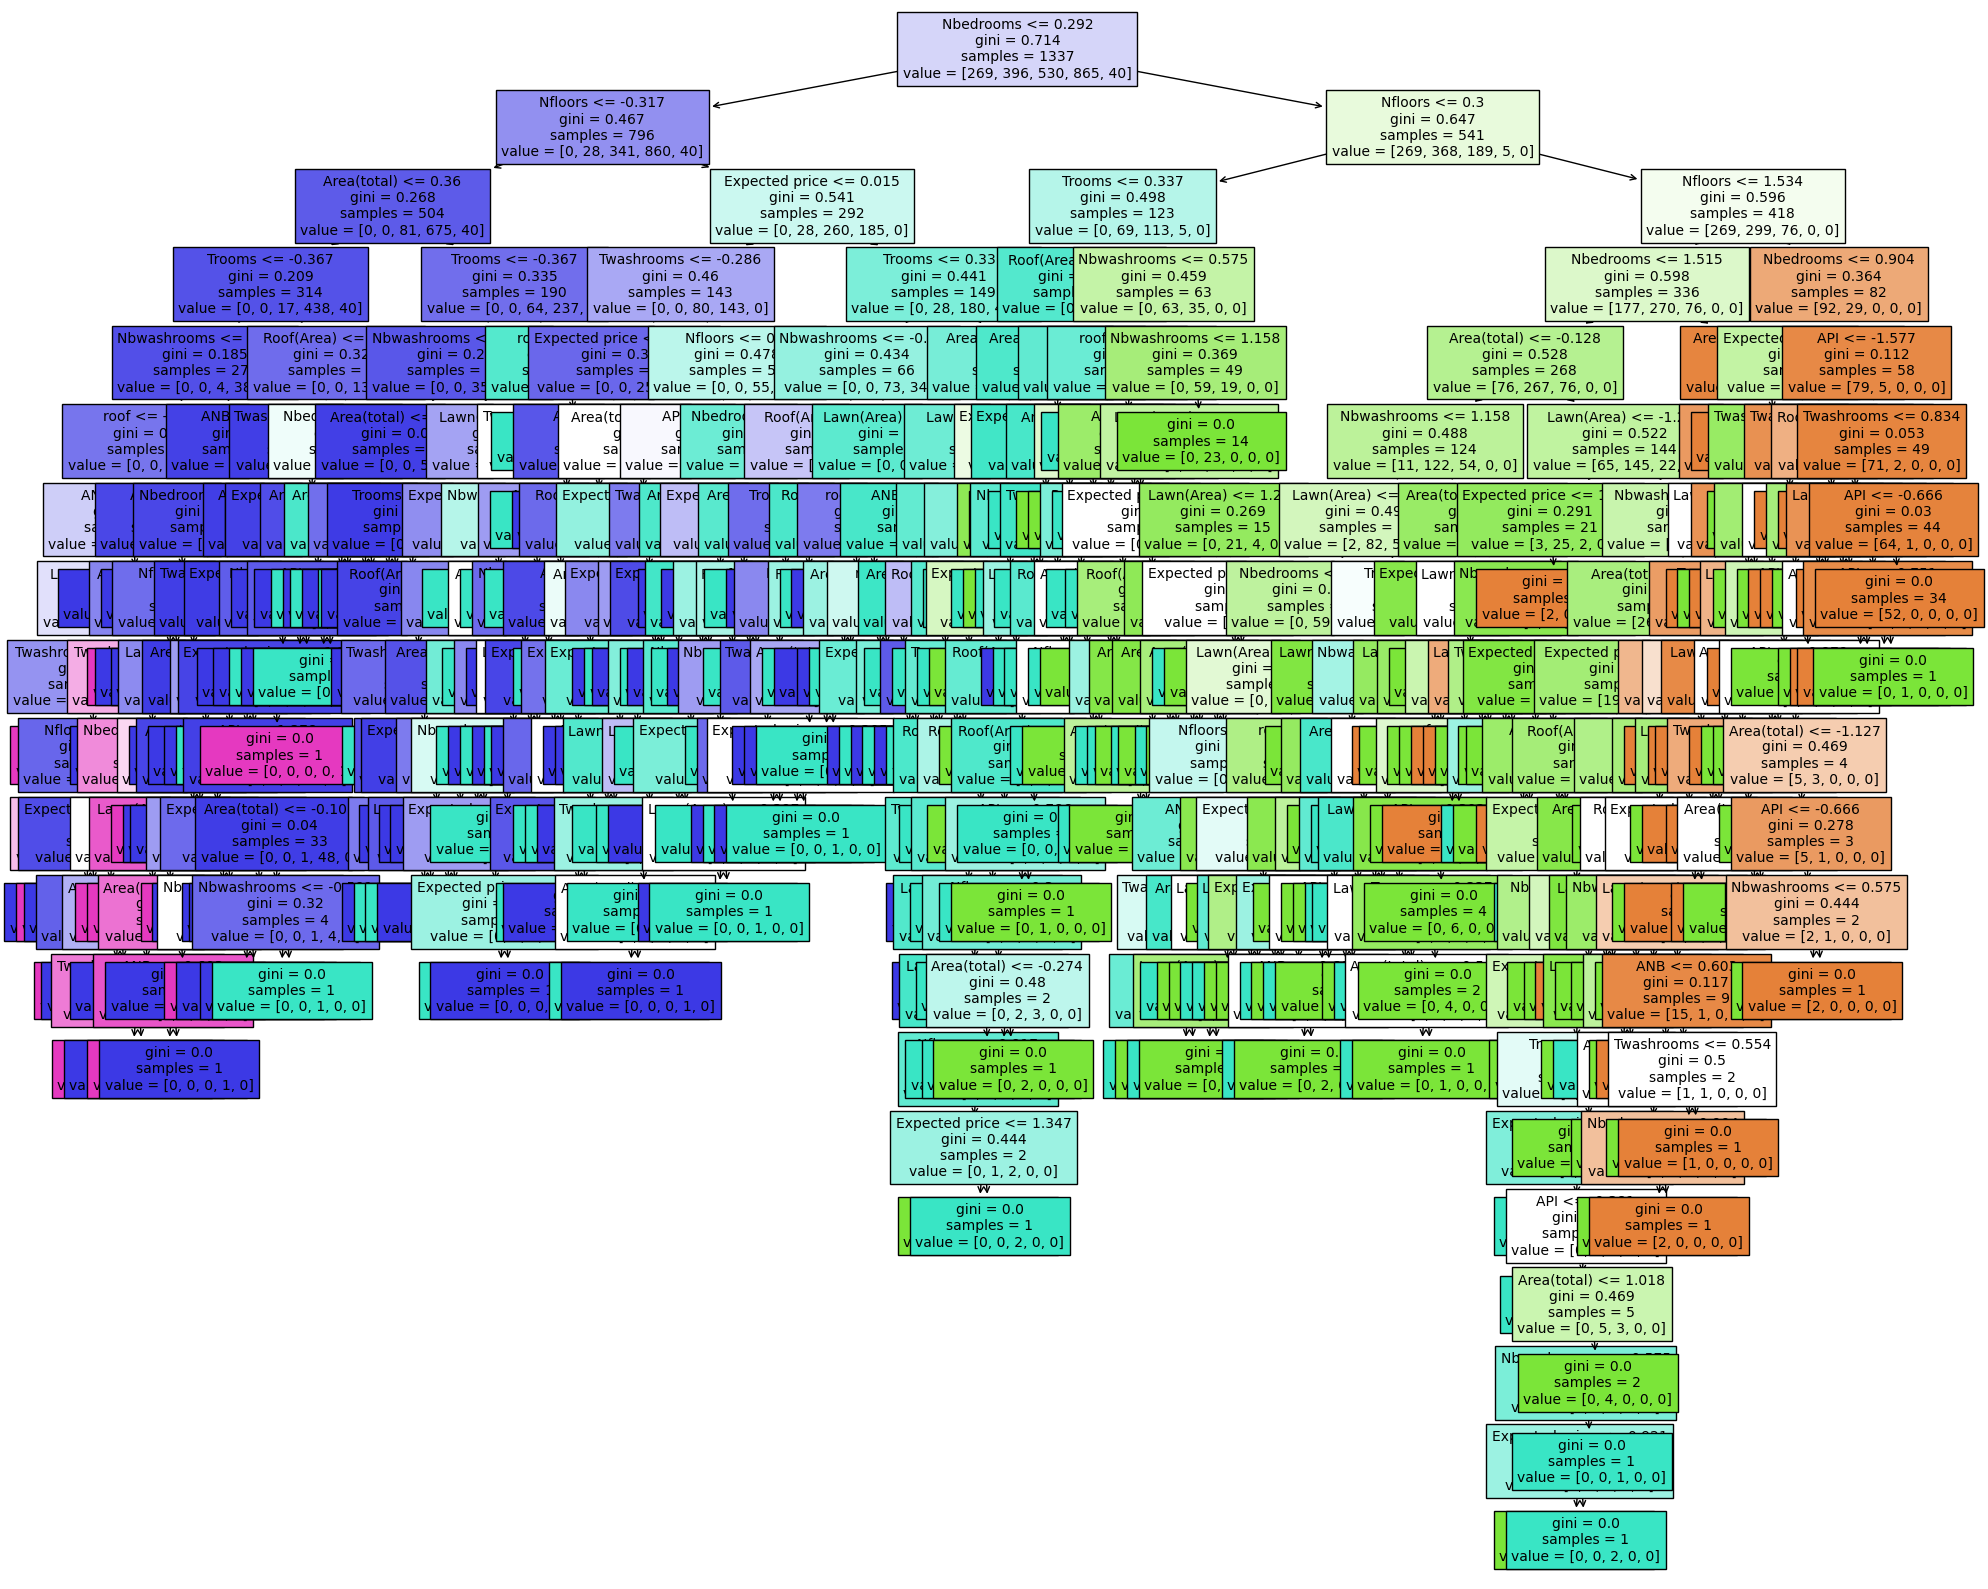

In [ ]:
plt.figure(figsize=(20,16))
plot_tree(model_random[0],fontsize=10,feature_names=X.columns,filled=True)
plt.tight_layout()
plt.show()

# Model 5 : SVC 

In [ ]:
model_svc=SVC()

In [ ]:
names.append(model_svc)

#### Training model , Prediction , and printing unique Classification : 

In [ ]:
model_svc.fit(x_train,y_train)

y_svc=model_svc.predict(x_test)

print('Unique Classes')
print(np.unique(y_svc),'\n')

x=np.unique(y_svc)

count=Counter(y_svc)

for i in x:
    print('Class {0} : {1} '.format(i,count[i]))

Unique Classes
[0 1 2 3 4] 

Class 0 : 125 
Class 1 : 150 
Class 2 : 189 
Class 3 : 415 
Class 4 : 21 


### The Score (efficiency of the model) :

In [ ]:
print('The Score of Model on Training Dataset : ',model_svc.score(x_train,y_train))
result.append(model_svc.score(x_test,y_test))
print('The Score of Model on Testing Dataset : ',model_svc.score(x_test,y_test))
print('The Accuracy Score of the Model : ',round(accuracy_score(y_test,y_svc),4)*100,'%')

The Score of Model on Training Dataset :  0.9647619047619047
The Score of Model on Testing Dataset :  0.93
The Accuracy Score of the Model :  93.0 %


In [ ]:
model_svc.intercept_

array([-0.32785682,  0.02623826, -0.13839572,  0.27724809,  0.53456519,
        0.01457949,  0.34063342,  0.08606656,  0.44342979,  1.46075788])

In [ ]:
model_svc.get_params

<bound method BaseEstimator.get_params of SVC()>

### Confusion Matrix and Plot 

[[113   5   0   0   0]
 [ 12 135   4   0   0]
 [  0  10 176   7   0]
 [  0   0   9 394   2]
 [  0   0   0  14  19]]

 Plot of Confusion Matrix : 



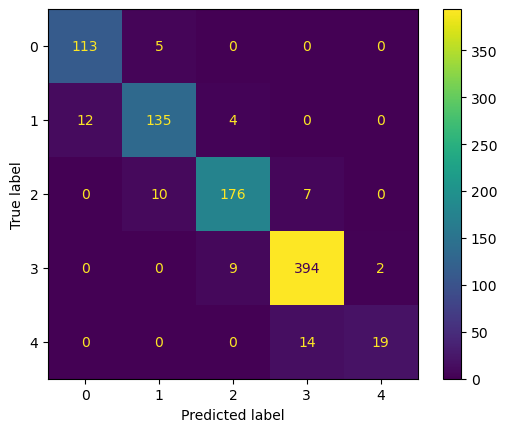

In [ ]:
print(confusion_matrix(y_test,y_svc))

print('\n Plot of Confusion Matrix : \n')
plot_confusion_matrix(model_svc,x_test,y_test)
plt.show()

### Classification Report

In [ ]:
print(classification_report(y_test,y_svc))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       118
           1       0.90      0.89      0.90       151
           2       0.93      0.91      0.92       193
           3       0.95      0.97      0.96       405
           4       0.90      0.58      0.70        33

    accuracy                           0.93       900
   macro avg       0.92      0.86      0.88       900
weighted avg       0.93      0.93      0.93       900



# Model 6 : AdaBoostClassifier

In [ ]:
model_ada=AdaBoostClassifier()

In [ ]:
names.append(model_ada)

#### Training model , Prediction , and printing unique Classification : 

In [ ]:
model_ada.fit(x_train,y_train)

y_ada=model_ada.predict(x_test)

print('Unique Classes')
print(np.unique(y_ada),'\n')

x=np.unique(y_ada)

count=Counter(y_ada)

for i in x:
    print('Class {0} : {1} '.format(i,count[i]))

Unique Classes
[1 2 3 4] 

Class 1 : 301 
Class 2 : 87 
Class 3 : 378 
Class 4 : 134 


### The Score (efficiency of the model) :

In [ ]:
print('The Score of Model on Training Dataset : ',model_ada.score(x_train,y_train))
result.append(model_ada.score(x_test,y_test))
print('The Score of Model on Testing Dataset : ',model_ada.score(x_test,y_test))
print('The Accuracy Score of the Model : ',round(accuracy_score(y_test,y_ada),4)*100,'%')

The Score of Model on Training Dataset :  0.5938095238095238
The Score of Model on Testing Dataset :  0.5744444444444444
The Accuracy Score of the Model :  57.440000000000005 %


## The Score of Model is really less and the classes predicted are also not according to desired result so we wont consider this model .

# Model 7 : Stacking 

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
def get_stacking():

    level0 = list()
    
    level0.append(('knn', KNeighborsClassifier()))
    level0.append(('cart', DecisionTreeClassifier()))
    level0.append(('svm', SVC()))
    level0.append(('knive',GaussianNB()))
    

    level1 = LogisticRegression()
    
    model = StackingClassifier(estimators=level0, final_estimator=level1)
    return model

model_stack=get_stacking()

In [ ]:
names.append(model_stack)

#### Training model , Prediction , and printing unique Classification : 

In [ ]:
model_stack.fit(x_train,y_train)

StackingClassifier(estimators=[('knn', KNeighborsClassifier()),
                               ('cart', DecisionTreeClassifier()),
                               ('svm', SVC()), ('knive', GaussianNB())],
                   final_estimator=LogisticRegression())

In [ ]:
y_stack=model_stack.predict(x_test)

np.unique(y_stack)

array([0, 1, 2, 3, 4])

In [ ]:
## Counting Each Classes :

from collections import Counter

x=0,1,2,3,4

count=Counter(y_stack)

for i in x:
    print('Class {0} : {1} '.format(i,count[i]))

Class 0 : 125 
Class 1 : 149 
Class 2 : 190 
Class 3 : 411 
Class 4 : 25 


### The Score (efficiency of the model) :

In [ ]:
print('The Score of Model on Training Dataset : ',model_stack.score(x_train,y_train))
result.append(model_stack.score(x_test,y_test))
print('The Score of Model on Testing Dataset : ',model_stack.score(x_test,y_test))
print('The Accuracy Score of the Model : ',round(accuracy_score(y_test,y_stack),4)*100,'%')

The Score of Model on Training Dataset :  0.969047619047619
The Score of Model on Testing Dataset :  0.9311111111111111
The Accuracy Score of the Model :  93.11 %


### Confusion Matrix and Plot 

[[114   4   0   0   0]
 [ 11 135   5   0   0]
 [  0  10 175   8   0]
 [  0   0  10 392   3]
 [  0   0   0  11  22]]

 Plot of Confusion Matrix : 



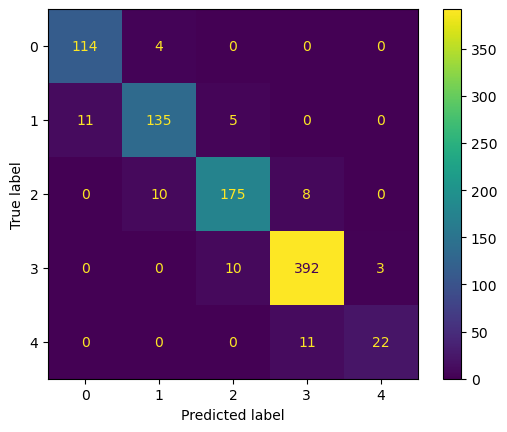

In [ ]:
print(confusion_matrix(y_test,y_stack))

print('\n Plot of Confusion Matrix : \n')
plot_confusion_matrix(model_stack,x_test,y_test)
plt.show()

### Classification Report

In [ ]:
print(classification_report(y_test,y_stack))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       118
           1       0.91      0.89      0.90       151
           2       0.92      0.91      0.91       193
           3       0.95      0.97      0.96       405
           4       0.88      0.67      0.76        33

    accuracy                           0.93       900
   macro avg       0.91      0.88      0.89       900
weighted avg       0.93      0.93      0.93       900



In [ ]:
model_stack.feature_names_in_

array(['Area(total)', 'Trooms', 'Nbedrooms', 'Nbwashrooms', 'Twashrooms',
       'roof', 'Roof(Area)', 'Lawn(Area)', 'Nfloors', 'API', 'ANB',
       'Expected price'], dtype=object)

In [ ]:
model_stack._validate_estimators

<bound method _BaseHeterogeneousEnsemble._validate_estimators of StackingClassifier(estimators=[('knn', KNeighborsClassifier()),
                               ('cart', DecisionTreeClassifier()),
                               ('svm', SVC()), ('knive', GaussianNB())],
                   final_estimator=LogisticRegression())>

# Combining Results of all the model in one Table:

In [ ]:
final_df=pd.DataFrame({'Model':names,'Accuracy Score':result})
final_df

Model  Accuracy Score
0                               LogisticRegression()        0.937778
1                           DecisionTreeClassifier()        0.852222
2                                       GaussianNB()        0.798889
3  (DecisionTreeClassifier(max_features='auto', r...        0.906667
4                                              SVC()        0.930000
5  (DecisionTreeClassifier(max_depth=1, random_st...        0.574444
6  StackingClassifier(estimators=[('knn', KNeighb...        0.931111

In [ ]:
name=['Logistic','Decision','Knive Bayes','Random Forest','SVC','AdaBoost','Stacking']

In [ ]:
final_df['Name']=name
final_df.head()

Model  Accuracy Score  \
0                               LogisticRegression()        0.937778   
1                           DecisionTreeClassifier()        0.852222   
2                                       GaussianNB()        0.798889   
3  (DecisionTreeClassifier(max_features='auto', r...        0.906667   
4                                              SVC()        0.930000   

            Name  
0       Logistic  
1       Decision  
2    Knive Bayes  
3  Random Forest  
4            SVC

In [ ]:
final_df=final_df.drop(columns='Model')
final_df.head()

Accuracy Score           Name
0        0.937778       Logistic
1        0.852222       Decision
2        0.798889    Knive Bayes
3        0.906667  Random Forest
4        0.930000            SVC

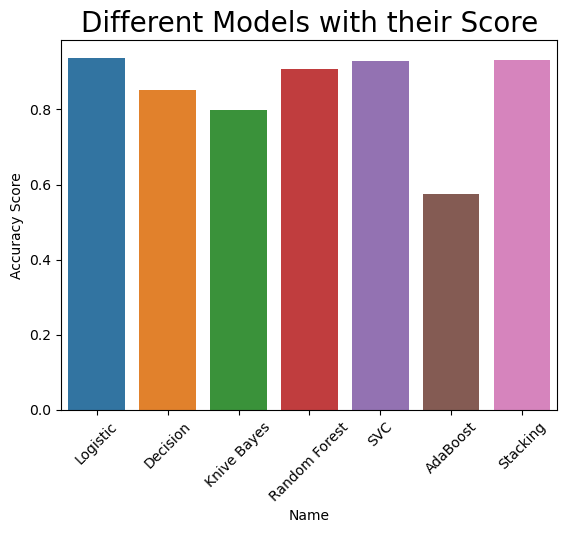

In [ ]:
sns.barplot(x='Name',y='Accuracy Score',data=final_df)
plt.xticks(rotation=45)
plt.title('Different Models with their Score',fontdict={'size':20})
plt.show()

# Findings :

## Logistic Regression is best suited algorithm and this model can be used to predict the House Types . Also Stacking , SVC and Random Forest can equally be further hypertuned to give best results.

# Hyperparameter Tuning for best model 

### Lets Try Hyper Parameter Tuning for Logistic Regression 

In [ ]:
c=np.logspace(0,4,10)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid=GridSearchCV(model_logictic,param_grid={'penalty':['l1','l2'],'C':c},n_jobs=-1)

In [ ]:
grid.fit(x_train,y_train)

GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']})

In [ ]:
grid.best_score_

0.9657142857142856

In [ ]:
best=grid.best_estimator_
best

LogisticRegression(C=1291.5496650148827)

In [ ]:
best.score(x_test,y_test)

0.9566666666666667

### Predict and Unique Value 

In [ ]:
y_best=best.predict(x_test)

In [ ]:
np.unique(y_best)

array([0, 1, 2, 3, 4])

### The Score (efficiency of the model) :

In [ ]:
print('The Score of Model on Training Dataset : ',best.score(x_train,y_train))
print('The Score of Model on Testing Dataset : ',best.score(x_test,y_test))
print('The Accuracy Score of the Model  : ',round(accuracy_score(y_test,y_best),4)*100,'%')

The Score of Model on Training Dataset :  0.98
The Score of Model on Testing Dataset :  0.9566666666666667
The Accuracy Score of the Model  :  95.67 %


In [ ]:
## Counting Each Classes :

from collections import Counter

x=0,1,2,3,4

count=Counter(y_best)

for i in x:
    print('Class {0} : {1} '.format(i,count[i]))

Class 0 : 121 
Class 1 : 144 
Class 2 : 201 
Class 3 : 403 
Class 4 : 31 


### Confusion Matrix and Plot 

[[115   3   0   0   0]
 [  6 139   6   0   0]
 [  0   2 183   8   0]
 [  0   0  12 393   0]
 [  0   0   0   2  31]]

 Plot of Confusion Matrix : 



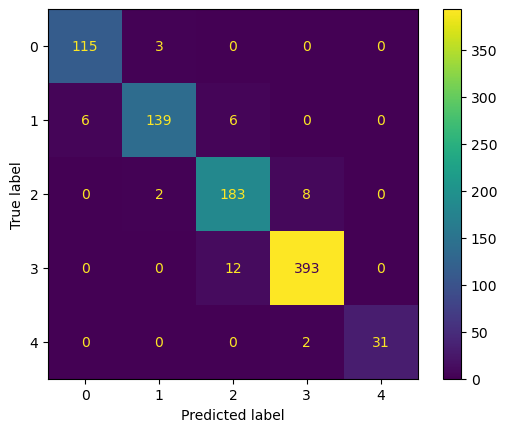

In [ ]:
print(confusion_matrix(y_test,y_best))

print('\n Plot of Confusion Matrix : \n')
plot_confusion_matrix(best,x_test,y_test)
plt.show()

### Classification Report

In [ ]:
print(classification_report(y_test,y_best))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       118
           1       0.97      0.92      0.94       151
           2       0.91      0.95      0.93       193
           3       0.98      0.97      0.97       405
           4       1.00      0.94      0.97        33

    accuracy                           0.96       900
   macro avg       0.96      0.95      0.96       900
weighted avg       0.96      0.96      0.96       900



# Intercept and Coefficients

In [ ]:
print('The Intercept is :',best.intercept_)

The Intercept is : [-74.48274131  10.09025798  55.88297862  47.78159736 -39.27209264]


### The Coefficient for different Class for different Features .

In [ ]:
pd.DataFrame(best.coef_,columns=X.columns)

Area(total)     Trooms  Nbedrooms  Nbwashrooms  Twashrooms      roof  \
0    18.555252  47.031407  29.028143    19.460575   10.176284  0.811280   
1    11.593054  22.993441  10.976441     9.573510    3.673676  0.542271   
2     1.152100  -5.299331  -6.150102    -3.714527   -0.952596  0.414951   
3    -7.763416 -22.083267 -12.084573   -10.590745   -4.721005  1.446162   
4   -23.536990 -42.642250 -21.769909   -14.728813   -8.176359 -3.214665   

   Roof(Area)  Lawn(Area)    Nfloors        API       ANB  Expected price  
0   17.577948    5.269829  19.658742  12.731308  2.234411       -0.484143  
1   10.036239    2.923557   7.344049   7.755359  1.493462       -1.036104  
2    0.207549    0.299456  -4.503285   1.274164  0.200095       -0.377069  
3   -8.204133   -1.786695  -9.380774  -4.875756 -0.689135        0.030624  
4  -19.617604   -6.706147 -13.118733 -16.885074 -3.238832        1.866692

# Best model to predict is :

In [ ]:
best 

LogisticRegression(C=1291.5496650148827)

# Interact Function for presentations :

In [ ]:
def models(model):

    model_interact=model
    
    model_interact.fit(x_train,y_train)

    y_inter=model_interact.predict(x_test)

    print('\n The Unique Predicted Classes : \n',np.unique(y_inter))
     
    x=np.unique(y_inter)

    count=Counter(y_inter)
    print(' ***********Count of Classes *********\n')
    for i in x:
        
        print('Class {0} : {1} '.format(i,count[i])) 
    
    print('\n************** Accuracy (Score of Model) ***************\n')

    print('The Score of Model on Training Dataset : ',model_interact.score(x_train,y_train))
    print('The Score of Model on Testing Dataset : ',model_interact.score(x_test,y_test),'\n')
    print('The Accuracy Score of the Model : ',round(accuracy_score(y_test,y_inter),4)*100,'%')
    
    print('\n******** Confusion Matrix ********\n')

    print(confusion_matrix(y_test,y_inter))

    print('\n Plot of Confusion Matrix : \n')
    plot_confusion_matrix(model_interact,x_test,y_test)
    plt.show()


    print('\n ********** Classification Report **********\n')

    print(classification_report(y_test,y_inter))

    if model.__class__.__name__== 'LogisticRegression':
        print('\nThe Intercept is :',model_interact.intercept_)
        print('\n The Coefficient for different class for different Features \n')
        print(pd.DataFrame(model_interact.coef_,columns=X.columns))
        

        print('\n Histogram for Prediction of Logistic Regression : \n')
        sns.histplot(y_inter)
        plt.show()

    elif  model.__class__.__name__== 'DecisionTreeClassifier'  :
        print('The DataFrame for Feature Importances\n')
        print('\n',pd.DataFrame(model_interact.feature_importances_,index=X.columns,columns=['Feature Importances']).sort_values(by='Feature Importances',ascending=False))
        plt.figure(figsize=(20,16))
        plot_tree(model_interact,fontsize=10,feature_names=X.columns,filled=True)
        plt.tight_layout()
        plt.show()

    elif  model.__class__.__name__== 'RandomForestClassifier'  :
        print('The DataFrame for Feature Importances\n')
        print('\n',pd.DataFrame(model_interact.feature_importances_,index=X.columns,columns=['Feature Importances']).sort_values(by='Feature Importances',ascending=False))
        plt.figure(figsize=(20,16))
        plot_tree(model_interact[0],fontsize=10,feature_names=X.columns,filled=True)
        plt.tight_layout()
        plt.show()

    elif  model.__class__.__name__== 'GaussianNB' :
        importance=permutation_importance(model_interact,x_test,y_test)
        importance
        print('\nThe DataFrame of Feature Importance\n')
        print(pd.DataFrame(importance.importances_mean,index=X.columns,columns=['Importances']).sort_values(by='Importances',ascending=False))



        

In [ ]:
from ipywidgets import interact
interact(models,model=[LogisticRegression(),DecisionTreeClassifier(),GaussianNB(),SVC(),RandomForestClassifier(),AdaBoostClassifier()])

interactive(children=(Dropdown(description='model', options=(LogisticRegression(), DecisionTreeClassifier(), G…

<function __main__.models(model)>

# Bussiness Report 